In [1]:
import numpy as np
import pandas as pd
from utils import *

In [2]:
total_solar_weather = np.load('total_solar_weather_pm_2013_2020.npy', allow_pickle=True)

In [14]:
locations = config_copy['experiments']['location_used']
loc_list = ['경상대', '남제주소내', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']
columns = config_copy['experiments']['features_used']

In [5]:
columns = ['발전률',
 '지점',
 '기온(°C)',    #!
 '강수량(mm)',  #!
 '풍속(m__s)',  #!
 '풍향(16방위)',
 '습도(%)',     #!
 '증기압(hPa)', #!
 '이슬점온도(°C)',
 '현지기압(hPa)',   #!
 '해면기압(hPa)',
 '일조(hr)',    #!
 '일사(MJ__m2)',    #!
 '적설(cm)',
 '3시간신적설(cm)',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '운형(운형약어)',
 '최저운고(100m )',
 '시정(10m)',
 '지면상태(지면상태코드)',
 '현상번호(국내식)',
 '지면온도(°C)',    #!
 '5cm 지중온도(°C)',
 '10cm 지중온도(°C)',
 '20cm 지중온도(°C)',
 '30cm 지중온도(°C)',
 '지역',
 '망',
 '측정소코드',
 '측정소명',
 '측정일시',
 'SO2',         #!
 'CO',          #!
 'O3',          #!
 'NO2',         #!
 'PM10',        #!
 'PM25',        #!
 '주소']

In [15]:
for loc in locations:
    if loc in loc_list:
        temp_data = pd.DataFrame(total_solar_weather[locations.index(loc)][35064:], columns=columns)
        temp_data.to_csv(f"./dataset/area/total_solar_weather_2017_2020_{loc}.csv", encoding='cp949', columns=columns)
    

PCC value 구하기

In [3]:
total_solar_weather[:, 35064:, 0].shape

(38, 35064)

In [4]:
locations = config_copy['experiments']['location_used']
columns = config_copy['experiments']['features_used']

In [26]:
feature_columns = ['발전률',
 '측정일시',
 '기온(°C)',    #!
 '강수량(mm)',  #!
 '풍속(m__s)',  #!
 '습도(%)',     #!
 '증기압(hPa)', #!
 '현지기압(hPa)',   #!
 '일조(hr)',    #!
#  '일사(MJ__m2)',    #!
 '시정(10m)', 
 '지면온도(°C)',    #!
 'SO2',         #!
 'CO',          #!
 'O3',          #!
 'NO2',         #!
 'PM10',        #!
 'PM25',        #!
 ]

##corr 구하기 위해서 feature별로 csv 파일 생성


for col in columns:
    temp_data = pd.DataFrame(total_solar_weather[:, 35064:, columns.index(col)].T, columns=locations)
    temp_data.to_csv(f"./dataset/features/total_area_2017_2020_{col}.csv", encoding='cp949')
    

##전체 

In [27]:
total_corr = pd.DataFrame(0.0, columns=locations, index=locations)
count = pd.DataFrame(0, columns=locations, index = ['count'])

for feature in feature_columns:
    try:
        print(feature)
        corr = pd.read_csv(f'./dataset/features/total_area_2017_2020_{feature}.csv', encoding='cp949', index_col=0)

        
        if feature == '강수량(mm)' or '일조(hr)' or '일사(MJ__m2)':
            corr = corr.fillna(0)
        else:
            corr = corr.ffill()
            corr = corr.bfill()
            
        corr = corr.corr()
        for loc0 in corr.columns:
            count[loc0] += 1
            for loc1 in corr.index:
                total_corr[loc0][loc1] += corr[loc0][loc1]
        
        
        corr.loc[loc_list, loc_list].to_csv(f'./dataset/corr/feature_corr_2017_2020_{feature}.csv', encoding='cp949')
    except:
        pass

발전률
측정일시
기온(°C)
강수량(mm)
풍속(m__s)
습도(%)
증기압(hPa)
현지기압(hPa)
일조(hr)
시정(10m)
지면온도(°C)
SO2
CO
O3
NO2
PM10
PM25


In [18]:
total_corr

경상대      광양항세방         구미  남동발전_본사사옥         영동         예천  \
경상대        15.000000   8.512228   9.323235  15.000000   8.545201   7.815317   
광양항세방       8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
구미          9.323235   7.440398  15.000000   9.323235   8.814813   8.600547   
남동발전_본사사옥  15.000000   8.512228   9.323235  15.000000   8.545201   7.815317   
영동          8.545201   6.922998   8.814813   8.545201  15.000000   7.763367   
예천          7.815317   6.756048   8.600547   7.815317   7.763367  15.000000   
남제주소내       7.281069   6.921582   6.457645   7.281069   6.211969   5.698345   
부산복합자재창고    9.029607   7.532711   8.138734   9.029607   7.981113   6.936923   
부산복합1단계     9.029607   7.532711   8.138734   9.029607   7.981113   6.936923   
부산수처리장      9.029607   7.532711   8.138734   9.029607   7.981113   6.936923   
부산신항        9.029607   7.532711   8.138734   9.029607   7.981113   6.936923   
부산본부        9.029607   7.532711   8.138734   9.029607   7.981113   6.936923   
삼척소내        7.416064   6.374982   7.393708   7.416064   7.333752   6.895105   
신인천소내       8.048304   6.819107   8.096325   8.048304  11.101487   7.291732   
신인천전망대      8.048304   6.819107   8.096325   8.048304  11.101487   7.291732   
신인천해수취수구    8.048304   6.819107   8.096325   8.048304  11.101487   7.291732   
영월본부        8.849874   6.944423   9.188154   8.849874  10.009306   8.445693   
영월철도부지      8.849874   6.944423   9.188154   8.849874  10.009306   8.445693   
위미2리        7.281069   6.921582   6.457645   7.281069   6.211969   5.698345   
인천수산정수장     8.048304   6.819107   8.096325   8.048304  11.101487   7.291732   
하동공설운동장     8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
하동변전소       8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
하동보건소       8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
하동본부        8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
하동정수장       8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
하동하수처리장     8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
광양항         8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
당진          6.905222   6.137622   6.683028   6.905222   8.489073   6.819755   
당진매립장_송악    6.905222   6.137622   6.683028   6.905222   8.489073   6.819755   
당진자재창고      6.905222   6.137622   6.683028   6.905222   8.489073   6.819755   
동해          7.245170   6.225622   7.609201   7.245170   7.682799   6.993626   
수원환경사업소     8.520344   7.200224   8.740877   8.520344  13.288421   8.105960   
황금물류센터      8.512228  15.000000   7.440398   8.512228   6.922998   6.756048   
세종시폐기물매립장   8.732876   7.358662   8.966387   8.732876   9.592238   8.122729   
연성정수장       7.786973   6.765590   8.276700   7.786973  10.854553   7.288310   
영암에프원b      8.199578   7.141481   8.039980   8.199578   8.465214   7.110573   
대구          9.779397   8.053209  10.297972   9.779397   8.747545   8.677335   
신안          9.261412   7.798898   8.918607   9.261412   8.774744   7.285376   

               남제주소내   부산복합자재창고    부산복합1단계     부산수처리장  ...   당진매립장_송악  \
경상대         7.281069   9.029607   9.029607   9.029607  ...   6.905222   
광양항세방       6.921582   7.532711   7.532711   7.532711  ...   6.137622   
구미          6.457645   8.138734   8.138734   8.138734  ...   6.683028   
남동발전_본사사옥   7.281069   9.029607   9.029607   9.029607  ...   6.905222   
영동          6.211969   7.981113   7.981113   7.981113  ...   8.489073   
예천          5.698345   6.936923   6.936923   6.936923  ...   6.819755   
남제주소내      15.000000   7.308668   7.308668   7.308668  ...   5.535239   
부산복합자재창고    7.308668  15.000000  15.000000  15.000000  ...   6.353718   
부산복합1단계     7.308668  15.000000  15.000000  15.000000  ...   6.353718   
부산수처리장      7.308668  15.000000  15.000000  15.000000  ...   6.353718   
부산신항        7.308668  15.000000  15.000000  15.000000  ...   6.353718   
부산본부        7.308668  15.000000  15.000000  15.000000  ... 

In [19]:
count

경상대  광양항세방  구미  남동발전_본사사옥  영동  예천  남제주소내  부산복합자재창고  부산복합1단계  부산수처리장  \
count   15     15  15         15  15  15     15        15       15      15   

       ...  당진매립장_송악  당진자재창고  동해  수원환경사업소  황금물류센터  세종시폐기물매립장  연성정수장  영암에프원b  \
count  ...        15      15  15       15      15         15     15      15   

       대구  신안  
count  15  15  

[1 rows x 38 columns]

['경상대', '광양항세방', '구미', '남동발전_본사사옥', '영동', '예천', '남제주소내', '부산복합자재창고',
       '부산복합1단계', '부산수처리장', '부산신항', '부산본부', '삼척소내', '신인천소내', '신인천전망대',
       '신인천해수취수구', '영월본부', '영월철도부지', '위미2리', '인천수산정수장', '하동공설운동장', '하동변전소',
       '하동보건소', '하동본부', '하동정수장', '하동하수처리장', '광양항', '당진', '당진매립장_송악', '당진자재창고',
       '동해', '수원환경사업소', '황금물류센터', '세종시폐기물매립장', '연성정수장', '영암에프원b', '대구', '신안']

In [4]:
loc_list = ['경상대', '남제주소내', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']


In [41]:
total_corr_avg = total_corr/17.0

In [42]:
total_corr_avg_loc = total_corr_avg.loc[loc_list, loc_list]

In [43]:
total_corr_avg_loc

경상대     남제주소내  부산복합자재창고      영월본부   인천수산정수장     하동보건소        신안
경상대       1.000000  0.537638  0.643726  0.631372  0.583140  0.614744  0.655713
남제주소내     0.537638  1.000000  0.537917  0.473756  0.476522  0.515133  0.546783
부산복합자재창고  0.643726  0.537917  1.000000  0.568942  0.568932  0.551130  0.596653
영월본부      0.631372  0.473756  0.568942  1.000000  0.646939  0.517628  0.618946
인천수산정수장   0.583140  0.476522  0.568932  0.646939  1.000000  0.510106  0.607362
하동보건소     0.614744  0.515133  0.551130  0.517628  0.510106  1.000000  0.567970
신안        0.655713  0.546783  0.596653  0.618946  0.607362  0.567970  1.000000

for i in range(len(total_corr_avg_loc)):
    total_corr_avg_loc.iloc[i,i] = np.nan

In [ ]:
total_corr_avg_loc.to_csv('total_corr_avg_loc.csv', encoding='cp949')

In [11]:
total_corr_avg_loc = pd.read_csv('total_corr_avg_loc.csv', encoding='cp949', index_col=0)
total_corr_avg_loc

경상대        예천     남제주소내  부산복합자재창고      영월본부   인천수산정수장  \
경상대            NaN  0.518281  0.492375  0.614140  0.599221  0.542306   
예천        0.518281       NaN  0.390100  0.475521  0.557326  0.482886   
남제주소내     0.492375  0.390100       NaN  0.497347  0.434382  0.433540   
부산복합자재창고  0.614140  0.475521  0.497347       NaN  0.542124  0.541783   
영월본부      0.599221  0.557326  0.434382  0.542124       NaN  0.616429   
인천수산정수장   0.542306  0.482886  0.433540  0.541783  0.616429       NaN   
하동보건소     0.595032  0.472878  0.487535  0.527943  0.491934  0.476378   
신안        0.619194  0.484225  0.508874  0.568242  0.587607  0.571507   

             하동보건소        신안  
경상대       0.595032  0.619194  
예천        0.472878  0.484225  
남제주소내     0.487535  0.508874  
부산복합자재창고  0.527943  0.568242  
영월본부      0.491934  0.587607  
인천수산정수장   0.476378  0.571507  
하동보건소          NaN  0.545357  
신안        0.545357       NaN

In [30]:
total_corr_avg_loc.max(), total_corr_avg_loc.min()

(경상대         0.619194
 예천          0.557326
 남제주소내       0.508874
 부산복합자재창고    0.614140
 영월본부        0.616429
 인천수산정수장     0.616429
 하동보건소       0.595032
 신안          0.619194
 dtype: float64,
 경상대         0.492375
 예천          0.390100
 남제주소내       0.390100
 부산복합자재창고    0.475521
 영월본부        0.434382
 인천수산정수장     0.433540
 하동보건소       0.472878
 신안          0.484225
 dtype: float64)

## 지역간 날씨 유사도 PCC 평균값 그래프
### Q. 평균? 유사도별 가중치?

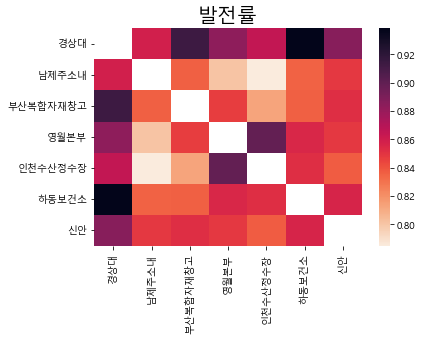

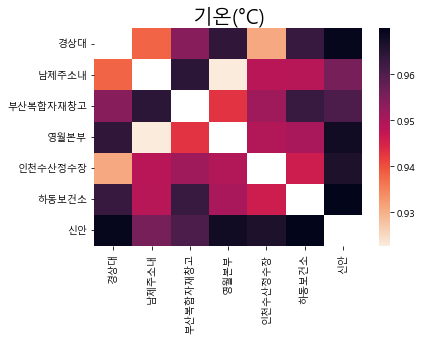

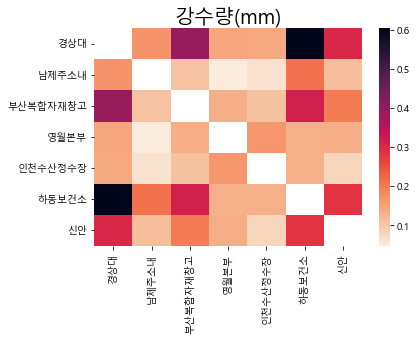

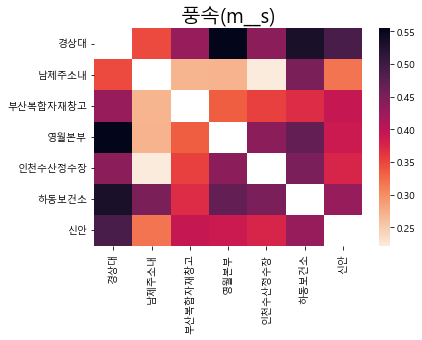

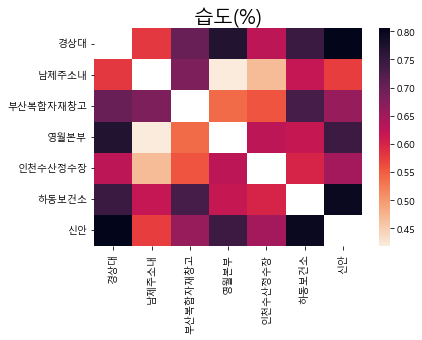

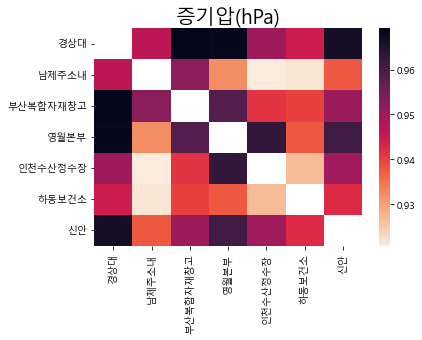

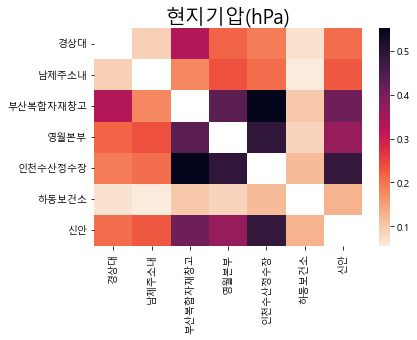

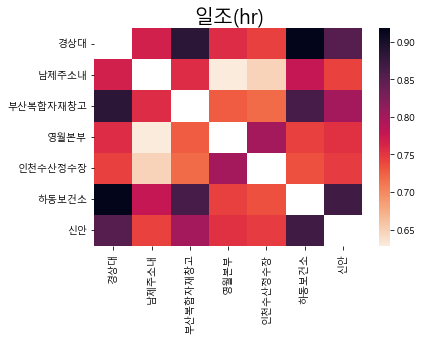

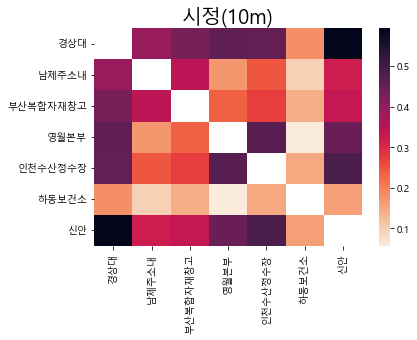

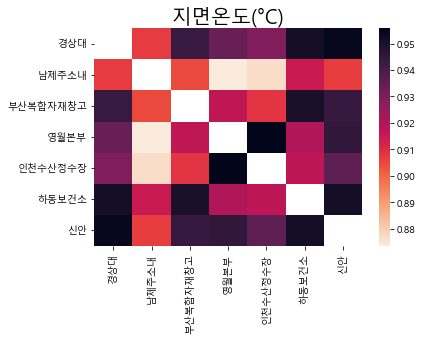

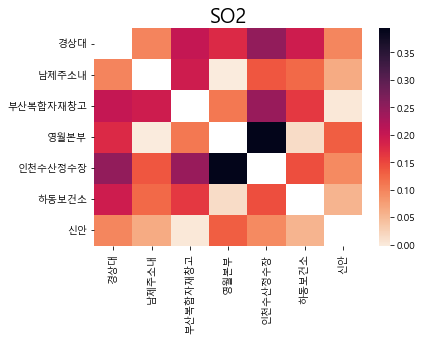

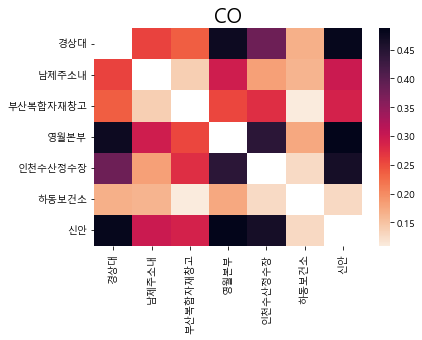

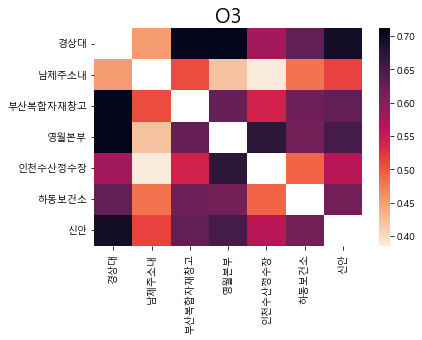

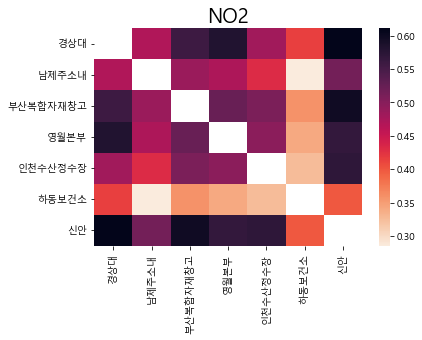

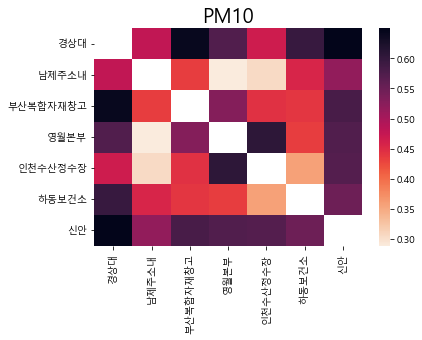

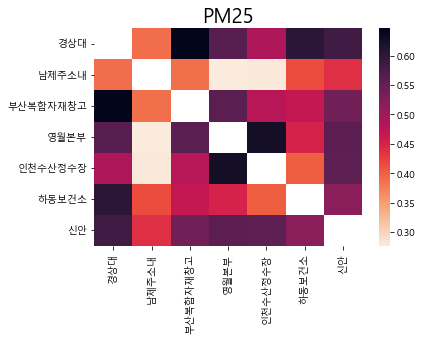

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
for feature in feature_columns:
    if feature == '측정일시':
        continue
    plt.figure()
    corr_matrix = pd.read_csv(f"./dataset/corr/feature_corr_2017_2020_{feature}.csv", encoding='cp949', index_col=0)
    for i in range(len(corr_matrix)):
        corr_matrix.iloc[i,i] = np.nan
    plt.title(f'{feature}', fontsize=20)
    sns.heatmap(corr_matrix, cmap='rocket_r')

In [54]:
solar_ratio = pd.read_csv(f"./dataset/corr/feature_corr_2017_2020_발전률.csv", encoding='cp949', index_col=0)
# solar_ratio = solar_ratio[loc_list]

In [60]:
solar_ratio
# solar_ratio_transform.corr()
#차이 없음

경상대     남제주소내  부산복합자재창고      영월본부   인천수산정수장     하동보건소        신안
경상대       1.000000  0.858770  0.913741  0.883450  0.865082  0.938426  0.885709
남제주소내     0.858770  1.000000  0.835914  0.800988  0.784949  0.835677  0.849003
부산복합자재창고  0.913741  0.835914  1.000000  0.846818  0.812648  0.836497  0.852471
영월본부      0.883450  0.800988  0.846818  1.000000  0.898910  0.855255  0.848955
인천수산정수장   0.865082  0.784949  0.812648  0.898910  1.000000  0.852693  0.837497
하동보건소     0.938426  0.835677  0.836497  0.855255  0.852693  1.000000  0.856586
신안        0.885709  0.849003  0.852471  0.848955  0.837497  0.856586  1.000000

In [57]:
solar_ratio.max()

경상대         1.0
남제주소내       1.0
부산복합자재창고    1.0
영월본부        1.0
인천수산정수장     1.0
하동보건소       1.0
신안          1.0
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler      #MinMax 이상치 제거?
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

scaler.fit(solar_ratio)   
temp = solar_ratio
solar_ratio_transform = scaler.transform(solar_ratio)

In [ ]:
temp.to_numpy()[:] = solar_ratio_transform
solar_ratio_transform = temp

In [ ]:
solar_ratio_transform

경상대   예천  남제주소내  부산복합자재창고  영월본부  인천수산정수장  하동보건소   신안
0      0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
1      0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
2      0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
3      0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
4      0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
...    ...  ...    ...       ...   ...      ...    ...  ...
35059  0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
35060  0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
35061  0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
35062  0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0
35063  0.0  0.0    0.0       0.0   0.0      0.0    0.0  0.0

[35064 rows x 8 columns]

In [ ]:
solar_ratio_transform.max()

경상대         1.0
예천          1.0
남제주소내       1.0
부산복합자재창고    1.0
영월본부        1.0
인천수산정수장     1.0
하동보건소       1.0
신안          1.0
dtype: float64

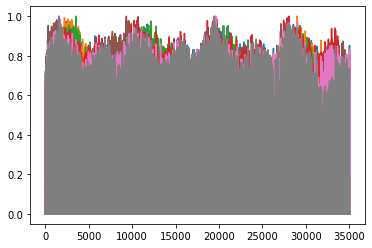

In [ ]:
plt.plot(solar_ratio_transform)

In [9]:
feature_columns = ['측정일시',
 '발전률',
 '기온(°C)',    #!
 '강수량(mm)',  #!
 '풍속(m__s)',  #!
 '습도(%)',     #!
 '증기압(hPa)', #!
 '현지기압(hPa)',   #!
 '일조(hr)',    #!
#  '일사(MJ__m2)',    #!
 '지면온도(°C)',    #!
 'SO2',         #!
 'CO',          #!
 'O3',          #!
 'NO2',         #!
 'PM10',        #!
 'PM25',        #!
 ]

In [62]:
# for i in loc_data.columns:
loc_data['PM25'] = loc_data['PM25'].ffill()

In [63]:
loc_data['PM25'][58]

79.0

In [64]:
feature == '강수량(mm)' or feature == '일조(hr)'

False

In [10]:
for loc in loc_list:
    loc_data = pd.read_csv(f"./dataset/area/total_solar_weather_2017_2020_{loc}.csv", encoding='cp949', index_col=0)
    loc_data = loc_data[feature_columns]
    for feature in loc_data.columns:
        # feature = ['PM10']
        if feature == '강수량(mm)' or feature == '일조(hr)' or feature == '발전률': #
            temp = loc_data[feature].fillna(0)
            loc_data[feature].to_numpy()[:] = temp
        else:
            loc_data[feature] = loc_data[feature].ffill()
            loc_data[feature] = loc_data[feature].bfill()
    print(loc_data.corr().iloc[0])
    loc_data.to_csv(f"./dataset/solar_weather_2017_2020_{loc}.csv", encoding='cp949', index=False)


측정일시         1.000000
발전률         -0.013241
기온(°C)       0.017343
강수량(mm)      0.033220
풍속(m__s)    -0.106284
습도(%)        0.168653
증기압(hPa)     0.085297
현지기압(hPa)   -0.004556
일조(hr)      -0.004439
지면온도(°C)     0.003713
SO2         -0.189196
CO          -0.192871
O3          -0.051359
NO2         -0.054054
PM10        -0.137461
PM25        -0.216955
Name: 측정일시, dtype: float64
측정일시         1.000000
발전률         -0.062974
기온(°C)       0.005276
강수량(mm)      0.017007
풍속(m__s)    -0.039358
습도(%)        0.119064
증기압(hPa)     0.018021
현지기압(hPa)   -0.006722
일조(hr)      -0.008972
지면온도(°C)     0.023683
SO2         -0.038155
CO          -0.110915
O3           0.110931
NO2         -0.014785
PM10        -0.067715
PM25        -0.168435
Name: 측정일시, dtype: float64
측정일시         1.000000
발전률         -0.010686
기온(°C)       0.015226
강수량(mm)      0.028450
풍속(m__s)    -0.013080
습도(%)        0.056325
증기압(hPa)     0.017476
현지기압(hPa)   -0.018390
일조(hr)      -0.024444
지면온도(°C)    -0.002458
SO2         -0.166659


In [125]:
data = pd.read_csv(f"./dataset/solar_weather_2017_2020_{loc}.csv", encoding='cp949')

In [132]:
feature_columns

['측정일시',
 '발전률',
 '기온(°C)',
 '강수량(mm)',
 '풍속(m__s)',
 '습도(%)',
 '증기압(hPa)',
 '현지기압(hPa)',
 '일조(hr)',
 '지면온도(°C)',
 'SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 'PM25']

In [126]:
data = data[feature_columns]

측정일시  발전률  기온(°C)  강수량(mm)  풍속(m__s)  습도(%)  증기압(hPa)  현지기압(hPa)  \
0      2017010101  0.0    -2.4      0.0       0.0   85.0       4.4     1026.5   
1      2017010102  0.0    -3.0      0.0       0.1   86.0       4.2     1026.2   
2      2017010103  0.0    -3.1      0.0       0.0   87.0       4.2     1026.6   
3      2017010104  0.0    -3.5      0.0       0.1   88.0       4.2     1026.8   
4      2017010105  0.0    -3.6      0.0       0.3   88.0       4.1     1026.2   
...           ...  ...     ...      ...       ...    ...       ...        ...   
35059  2020123120  0.0     0.1      0.0       3.4   56.0       3.5     1020.6   
35060  2020123121  0.0    -0.2      0.0       3.0   63.0       3.8     1020.9   
35061  2020123122  0.0     0.1      0.0       2.4   60.0       3.7     1020.8   
35062  2020123123  0.0    -0.9      0.0       0.5   65.0       3.7     1021.0   
35063  2020123124  0.0    -3.1      0.0       0.6   74.0       3.6     1021.7   

       일조(hr)  지면온도(°C)    SO2   CO     O3    NO2  PM10  PM25  
0         0.0      -1.3  0.002  0.8  0.010  0.024  60.0  26.0  
1         0.0      -1.5  0.003  0.8  0.008  0.027  51.0  32.0  
2         0.0      -1.7  0.002  0.7  0.011  0.021  53.0  29.0  
3         0.0      -1.8  0.002  0.7  0.008  0.020  46.0  22.0  
4         0.0      -1.9  0.006  0.8  0.007  0.023  45.0  33.0  
...       ...       ...    ...  ...    ...    ...   ...   ...  
35059     0.0      -0.4  0.005  0.4  0.026  0.012   7.0   0.0  
35060     0.0      -0.5  0.005  0.3  0.028  0.010   9.0   0.0  
35061     0.0      -0.9  0.005  0.4  0.019  0.017  11.0   0.0  
35062     0.0      -1.3  0.006  0.4  0.009  0.025  11.0   2.0  
35063     0.0      -1.7  0.006  0.4  0.008  0.026  19.0   4.0  

[35064 rows x 16 columns]

------------

In [5]:
import argparse
import numpy as np
import pandas as pd
from utils import *
from models import CNN1
from dataset import KORDataset, KORCSVDataset

parser = argparse.ArgumentParser()

parser.add_argument('--device',type=str,default='cuda:0',help='')
# parser.add_argument('--data',type=str,default='./total_solar_weather_pm_2013_2020.npy',help='data path')
parser.add_argument('--batch_size',type=int,default=64,help='batch size')
parser.add_argument('--seq_len',type=int,default=3,help='seq len')

args = parser.parse_args(args=[])

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [6]:
feature_columns

['측정일시',
 '발전률',
 '기온(°C)',
 '강수량(mm)',
 '풍속(m__s)',
 '습도(%)',
 '증기압(hPa)',
 '현지기압(hPa)',
 '일조(hr)',
 '지면온도(°C)',
 'SO2',
 'CO',
 'O3',
 'NO2',
 'PM10',
 'PM25']

In [8]:
feature_columns
loc_list = config['experiments']['location_used'].copy()

In [21]:
temp_data = pd.read_csv(f'./dataset/solar_weather_2017_2020_경상대.csv', encoding='cp949')
temp_data.corr()['발전률']

측정일시        -0.013241
발전률          1.000000
기온(°C)       0.243226
강수량(mm)     -0.075952
풍속(m__s)     0.410628
습도(%)       -0.503371
증기압(hPa)    -0.057038
현지기압(hPa)    0.012563
일조(hr)       0.805358
지면온도(°C)     0.450913
SO2          0.149228
CO          -0.040481
O3           0.453621
NO2         -0.173898
PM10         0.085280
PM25         0.147652
Name: 발전률, dtype: float64

In [ ]:
for loc in loc_list:
    temp_data = pd.read_csv(f'./dataset/solar_weather_2017_2020_{loc}.csv', encoding='cp949')

In [7]:
for loc in loc_list:
    temp_data = pd.read_csv(f'./dataset/solar_weather_2017_2020_{loc}.csv', encoding='cp949')
    print(loc)
    print(temp_data)
    break
    # temp_data.to_csv(f"./dataset/features/total_area_2017_2020_{col}.csv", encoding='cp949')
    

UnicodeDecodeError: 'cp949' codec can't decode byte 0xbd in position 48: illegal multibyte sequence

In [77]:
for loc in loc_list:
    train = KORCSVDataset(args.seq_len, locals=0, features = feature_columns, data_path=f"./dataset/solar_weather_2017_2020_{loc}.csv")

TypeError: _get_idx() takes 1 positional argument but 2 were given

In [129]:
model = CNN1()

In [113]:
config['experiments']['location_used']

['부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']

In [19]:
loc_list_full = loc_list[:]

In [20]:
loc_list_full

['경상대', '남제주소내', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']

In [32]:
loc_list = loc_list_full[:]
train_loc = loc_list[1]

In [33]:
loc_list.remove(train_loc)

In [34]:
loc_list

['경상대', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
%matplotlib inline
# scaler = MinMaxScaler()
scaler = StandardScaler()
iqr_scaler = RobustScaler(unit_variance=False)
train_dataset = pd.read_csv(f'./dataset/solar_weather_2017_2020_경상대.csv', encoding='cp949', index_col=0)
train_dataset
train_dataset.columns
train_dataset_transform = train_dataset.copy()
scaler.fit(train_dataset)
train_dataset_transform[:] = scaler.transform(train_dataset)

from collections import Counter 

def detect_outliers(df, n, features): 
    outlier_indices = [] 
    for col in features: 
        
        Q1 = np.percentile(df[col], 25) 
        Q3 = np.percentile(df[col], 75) 
        IQR = Q3 - Q1 
        outlier_step = 1.5 * IQR 
        print(col)
        print(Q1 - outlier_step, Q3 + outlier_step)
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices) 
    # print(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 

    # return multiple_outliers
    return df[~df.index.isin(multiple_outliers)]

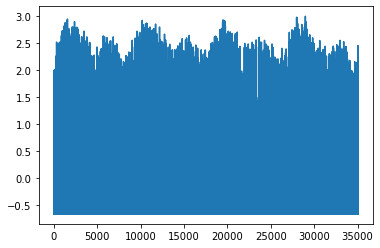

In [143]:
plt.plot([i for i in range(len(train_dataset_transform))], train_dataset_transform.iloc[:, 0])

In [165]:
plt.rcParams['font.family'] = 'Malgun Gothic'

def plot_hist(df):
    for col in df.columns:
        plt.figure(figsize=(3,1))
        plt.hist(df[col])
        plt.title(col, fontsize=8)
# train_dataset.hist()

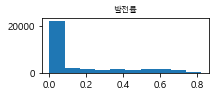

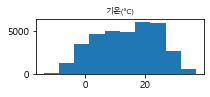

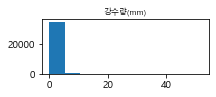

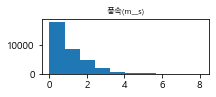

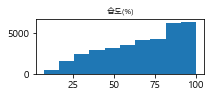

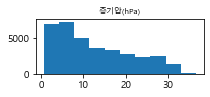

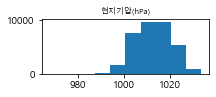

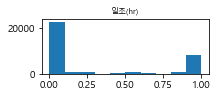

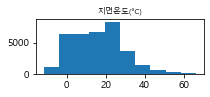

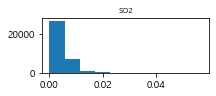

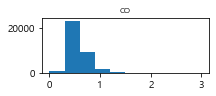

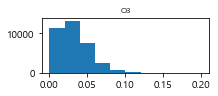

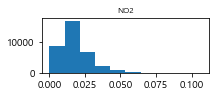

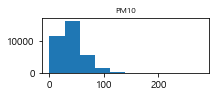

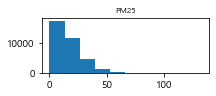

In [166]:
plot_hist(train_dataset)

D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


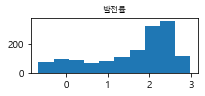

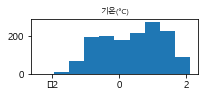

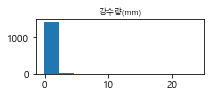

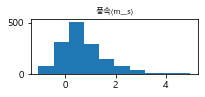

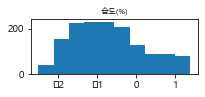

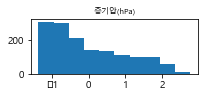

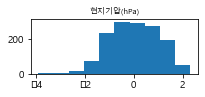

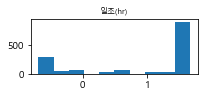

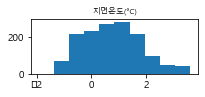

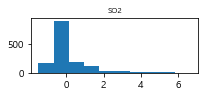

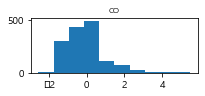

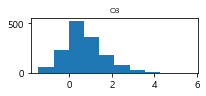

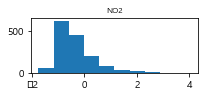

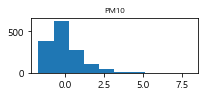

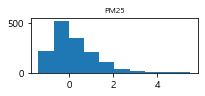

In [169]:
train_sunny = train_dataset_transform.iloc[12::24].copy()
plot_hist(train_sunny)

In [171]:
train_sunny = train_dataset_transform.iloc[12::24].copy()
train_sunny_without_outliers = detect_outliers(train_sunny, 1, train_sunny.columns)

발전률
-1.0126380861053428 4.401192759574895
기온(°C)
-2.6856241850304237 3.430872613262771
강수량(mm)
-0.13715533927915186 -0.13715533927915186
풍속(m__s)
-1.474383779702754 2.5579222870708236
습도(%)
-3.3322935309692965 1.817063275940408
증기압(hPa)
-3.296977768100275 3.1534335932185265
현지기압(hPa)
-3.0272520377205567 3.1045084998823604
일조(hr)
-3.0296241200880454 4.4808176948002405
지면온도(°C)
-2.4607930711657455 3.798520404352812
SO2
-1.973800984416163 1.7898271474870584
CO
-2.0514511863254397 1.9735657765235608
O3
-1.5731156632220276 2.839409305431927
NO2
-2.05734615282114 1.0921486819038015
PM10
-2.5781056452379696 2.275155014012137
PM25
-2.2220294043634152 2.472675516618462
Counter({2018022313: 5, 2017010413: 5, 2017071313: 5, 2017112213: 5, 2017122913: 5, 2018121713: 5, 2017122413: 4, 2017012013: 4, 2018042913: 4, 2017043013: 4, 2017052813: 4, 2017072213: 4, 2017112813: 4, 2018042813: 4, 2019052313: 4, 2019052413: 4, 2017123013: 4, 2019121013: 4, 2017121013: 3, 2018011613: 3, 2017010913: 3, 2017011

In [173]:
train_sunny_without_outliers.corr()

발전률    기온(°C)   강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  \
발전률        1.000000 -0.055634 -0.307851  0.312161 -0.717942 -0.369895   
기온(°C)    -0.055634  1.000000 -0.015358 -0.023524  0.365202  0.839005   
강수량(mm)   -0.307851 -0.015358  1.000000 -0.103097  0.319198  0.121050   
풍속(m__s)   0.312161 -0.023524 -0.103097  1.000000 -0.361437 -0.158880   
습도(%)     -0.717942  0.365202  0.319198 -0.361437  1.000000  0.717386   
증기압(hPa)  -0.369895  0.839005  0.121050 -0.158880  0.717386  1.000000   
현지기압(hPa)  0.267791 -0.741487 -0.107289 -0.013005 -0.496008 -0.739117   
일조(hr)     0.825708 -0.104617 -0.264432  0.306150 -0.745790 -0.414265   
지면온도(°C)   0.164920  0.905390 -0.087466  0.059771  0.118492  0.647770   
SO2        0.025277  0.057334 -0.024679 -0.088564 -0.020037  0.027079   
CO        -0.052177 -0.322775  0.005873 -0.134885 -0.039255 -0.247355   
O3         0.418027  0.450099 -0.187099  0.193230 -0.295230  0.092122   
NO2       -0.206516 -0.222889  0.022604 -0.339244  0.088769 -0.145510   
PM10       0.171689 -0.049774 -0.130196 -0.049514 -0.242021 -0.199593   
PM25       0.119770 -0.050533 -0.152772 -0.152331 -0.155140 -0.116893   

           현지기압(hPa)    일조(hr)  지면온도(°C)       SO2        CO        O3  \
발전률         0.267791  0.825708  0.164920  0.025277 -0.052177  0.418027   
기온(°C)     -0.741487 -0.104617  0.905390  0.057334 -0.322775  0.450099   
강수량(mm)    -0.107289 -0.264432 -0.087466 -0.024679  0.005873 -0.187099   
풍속(m__s)   -0.013005  0.306150  0.059771 -0.088564 -0.134885  0.193230   
습도(%)      -0.496008 -0.745790  0.118492 -0.020037 -0.039255 -0.295230   
증기압(hPa)   -0.739117 -0.414265  0.647770  0.027079 -0.247355  0.092122   
현지기압(hPa)   1.000000  0.312255 -0.636194 -0.020657  0.220998 -0.276410   
일조(hr)      0.312255  1.000000  0.131220  0.025161  0.022723  0.378628   
지면온도(°C)   -0.636194  0.131220  1.000000  0.054025 -0.332999  0.583897   
SO2        -0.020657  0.025161  0.054025  1.000000  0.321387  0.121982   
CO          0.220998  0.022723 -0.332999  0.321387  1.000000 -0.058559   
O3         -0.276410  0.378628  0.583897  0.121982 -0.058559  1.000000   
NO2         0.142941 -0.115853 -0.235462  0.411191  0.502566 -0.198423   
PM10        0.117952  0.196064 -0.012626  0.319129  0.396184  0.274503   
PM25        0.146382  0.160617 -0.007253  0.336019  0.445973  0.249392   

                NO2      PM10      PM25  
발전률       -0.206516  0.171689  0.119770  
기온(°C)    -0.222889 -0.049774 -0.050533  
강수량(mm)    0.022604 -0.130196 -0.152772  
풍속(m__s)  -0.339244 -0.049514 -0.152331  
습도(%)      0.088769 -0.242021 -0.155140  
증기압(hPa)  -0.145510 -0.199593 -0.116893  
현지기압(hPa)  0.142941  0.117952  0.146382  
일조(hr)    -0.115853  0.196064  0.160617  
지면온도(°C)  -0.235462 -0.012626 -0.007253  
SO2        0.411191  0.319129  0.336019  
CO         0.502566  0.396184  0.445973  
O3        -0.198423  0.274503  0.249392  
NO2        1.000000  0.336822  0.444861  
PM10       0.336822  1.000000  0.713247  
PM25       0.444861  0.713247  1.000000

In [127]:
train_dataset_transform[~train_dataset_transform.index.isin(Outliers_to_drop)].corr()

발전률    기온(°C)   강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  \
발전률        1.000000  0.234933 -0.075443  0.409728 -0.503170 -0.061067   
기온(°C)     0.234933  1.000000  0.065506  0.204555  0.089007  0.838518   
강수량(mm)   -0.075443  0.065506  1.000000  0.010110  0.156780  0.132447   
풍속(m__s)   0.409728  0.204555  0.010110  1.000000 -0.578289 -0.074249   
습도(%)     -0.503170  0.089007  0.156780 -0.578289  1.000000  0.513135   
증기압(hPa)  -0.061067  0.838518  0.132447 -0.074249  0.513135  1.000000   
현지기압(hPa)  0.019728 -0.754811 -0.134471 -0.138002 -0.285266 -0.740649   
일조(hr)     0.802542  0.242357 -0.092307  0.455099 -0.604384 -0.107892   
지면온도(°C)   0.442926  0.941533  0.037080  0.270673 -0.034105  0.726765   
SO2        0.115377  0.036347 -0.041156  0.020140 -0.128252 -0.021482   
CO        -0.072510 -0.391429 -0.058651 -0.150447  0.001768 -0.338075   
O3         0.444008  0.461378 -0.023081  0.501490 -0.520262  0.081772   
NO2       -0.193665 -0.369377 -0.060034 -0.316191  0.055991 -0.299213   
PM10       0.072357 -0.118483 -0.144491 -0.102382 -0.096851 -0.200284   
PM25       0.145442 -0.053515 -0.110472 -0.175046  0.055885 -0.039269   

           현지기압(hPa)    일조(hr)  지면온도(°C)       SO2        CO        O3  \
발전률         0.019728  0.802542  0.442926  0.115377 -0.072510  0.444008   
기온(°C)     -0.754811  0.242357  0.941533  0.036347 -0.391429  0.461378   
강수량(mm)    -0.134471 -0.092307  0.037080 -0.041156 -0.058651 -0.023081   
풍속(m__s)   -0.138002  0.455099  0.270673  0.020140 -0.150447  0.501490   
습도(%)      -0.285266 -0.604384 -0.034105 -0.128252  0.001768 -0.520262   
증기압(hPa)   -0.740649 -0.107892  0.726765 -0.021482 -0.338075  0.081772   
현지기압(hPa)   1.000000  0.030225 -0.671961 -0.001544  0.301945 -0.305966   
일조(hr)      0.030225  1.000000  0.407794  0.135770 -0.052867  0.501660   
지면온도(°C)   -0.671961  0.407794  1.000000  0.057382 -0.371884  0.546388   
SO2        -0.001544  0.135770  0.057382  1.000000  0.278155  0.100816   
CO          0.301945 -0.052867 -0.371884  0.278155  1.000000 -0.206246   
O3         -0.305966  0.501660  0.546388  0.100816 -0.206246  1.000000   
NO2         0.309390 -0.140018 -0.364326  0.317949  0.559089 -0.366592   
PM10        0.144825  0.097608 -0.092072  0.314267  0.464772  0.064863   
PM25        0.079840  0.104421 -0.012491  0.326010  0.477723  0.016629   

                NO2      PM10      PM25  
발전률       -0.193665  0.072357  0.145442  
기온(°C)    -0.369377 -0.118483 -0.053515  
강수량(mm)   -0.060034 -0.144491 -0.110472  
풍속(m__s)  -0.316191 -0.102382 -0.175046  
습도(%)      0.055991 -0.096851  0.055885  
증기압(hPa)  -0.299213 -0.200284 -0.039269  
현지기압(hPa)  0.309390  0.144825  0.079840  
일조(hr)    -0.140018  0.097608  0.104421  
지면온도(°C)  -0.364326 -0.092072 -0.012491  
SO2        0.317949  0.314267  0.326010  
CO         0.559089  0.464772  0.477723  
O3        -0.366592  0.064863  0.016629  
NO2        1.000000  0.460444  0.406084  
PM10       0.460444  1.000000  0.753425  
PM25       0.406084  0.753425  1.000000

In [189]:
temp0 = 0
temp1 = 1
temp2 = 2
temp3 = 3
temp4 = 4
temp5 = 5
temp6 = 6

In [192]:
temp_list = [temp0, temp1, temp2, temp3, temp4, temp5, temp6]
# temp_list_copy = [temp0, temp1, temp2, temp3, temp4, temp5, temp6]
for temp in temp_list:
    print(temp)
    temp_list_copy = temp_list[:]
    loc0 = temp_list_copy.pop(temp)
    print(loc0, temp_list_copy)

0
0 [1, 2, 3, 4, 5, 6]
1
1 [0, 2, 3, 4, 5, 6]
2
2 [0, 1, 3, 4, 5, 6]
3
3 [0, 1, 2, 4, 5, 6]
4
4 [0, 1, 2, 3, 5, 6]
5
5 [0, 1, 2, 3, 4, 6]
6
6 [0, 1, 2, 3, 4, 5]


In [213]:
pd.DataFrame(np.zeros((1,6)))

0    0.0
Name: 1, dtype: float64

In [5]:
train_dataset.iloc[12::24].corr().iloc[:,0]

발전률          1.000000
기온(°C)      -0.031508
강수량(mm)     -0.301045
풍속(m__s)     0.304485
습도(%)       -0.713381
증기압(hPa)    -0.355337
현지기압(hPa)    0.246433
일조(hr)       0.824418
지면온도(°C)     0.181068
SO2          0.064087
CO          -0.000990
O3           0.419357
NO2         -0.167676
PM10         0.159175
PM25         0.097980
Name: 발전률, dtype: float64

In [6]:
train_dataset[np.logical_and(train_dataset['발전률'] > 0.0, train_dataset['강수량(mm)'] == 0.0)].corr()

발전률    기온(°C)  강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  \
발전률        1.000000  0.135046      NaN  0.321778 -0.478184 -0.132970   
기온(°C)     0.135046  1.000000      NaN  0.172922  0.050107  0.802540   
강수량(mm)         NaN       NaN      NaN       NaN       NaN       NaN   
풍속(m__s)   0.321778  0.172922      NaN  1.000000 -0.564066 -0.117082   
습도(%)     -0.478184  0.050107      NaN -0.564066  1.000000  0.538420   
증기압(hPa)  -0.132970  0.802540      NaN -0.117082  0.538420  1.000000   
현지기압(hPa)  0.095945 -0.752609      NaN -0.127418 -0.265427 -0.724477   
일조(hr)     0.656815  0.142623      NaN  0.387098 -0.641384 -0.213453   
지면온도(°C)   0.354368  0.926158      NaN  0.246514 -0.088346  0.667824   
SO2        0.070497 -0.019426      NaN -0.075602 -0.039479 -0.043429   
CO        -0.043304 -0.344736      NaN -0.144449  0.028359 -0.274644   
O3         0.397880  0.528166      NaN  0.458468 -0.514948  0.105249   
NO2       -0.261748 -0.365352      NaN -0.360797  0.163935 -0.237844   
PM10       0.039350 -0.147535      NaN -0.118640 -0.024714 -0.187967   
PM25       0.110089 -0.149718      NaN -0.246921  0.122518 -0.067939   

           현지기압(hPa)    일조(hr)  지면온도(°C)       SO2        CO        O3  \
발전률         0.095945  0.656815  0.354368  0.070497 -0.043304  0.397880   
기온(°C)     -0.752609  0.142623  0.926158 -0.019426 -0.344736  0.528166   
강수량(mm)          NaN       NaN       NaN       NaN       NaN       NaN   
풍속(m__s)   -0.127418  0.387098  0.246514 -0.075602 -0.144449  0.458468   
습도(%)      -0.265427 -0.641384 -0.088346 -0.039479  0.028359 -0.514948   
증기압(hPa)   -0.724477 -0.213453  0.667824 -0.043429 -0.274644  0.105249   
현지기압(hPa)   1.000000  0.116374 -0.665073  0.035660  0.257483 -0.328649   
일조(hr)      0.116374  1.000000  0.278231  0.087356 -0.023133  0.468574   
지면온도(°C)   -0.665073  0.278231  1.000000  0.008943 -0.324500  0.622024   
SO2         0.035660  0.087356  0.008943  1.000000  0.505606  0.081592   
CO          0.257483 -0.023133 -0.324500  0.505606  1.000000 -0.102227   
O3         -0.328649  0.468574  0.622024  0.081592 -0.102227  1.000000   
NO2         0.238853 -0.163560 -0.370555  0.485047  0.584470 -0.303067   
PM10        0.132695  0.061310 -0.122928  0.426277  0.513126  0.079223   
PM25        0.144201  0.027894 -0.106948  0.444953  0.558877 -0.011900   

                NO2      PM10      PM25  
발전률       -0.261748  0.039350  0.110089  
기온(°C)    -0.365352 -0.147535 -0.149718  
강수량(mm)         NaN       NaN       NaN  
풍속(m__s)  -0.360797 -0.118640 -0.246921  
습도(%)      0.163935 -0.024714  0.122518  
증기압(hPa)  -0.237844 -0.187967 -0.067939  
현지기압(hPa)  0.238853  0.132695  0.144201  
일조(hr)    -0.163560  0.061310  0.027894  
지면온도(°C)  -0.370555 -0.122928 -0.106948  
SO2        0.485047  0.426277  0.444953  
CO         0.584470  0.513126  0.558877  
O3        -0.303067  0.079223 -0.011900  
NO2        1.000000  0.484999  0.508912  
PM10       0.484999  1.000000  0.754379  
PM25       0.508912  0.754379  1.000000

In [61]:
train_sunny

NameError: name 'train_sunny' is not defined

In [67]:
train_sunny.to_csv('./dataset/normalized_data/solar_weather_2017_2020_경상대.csv')

In [39]:
train_sunny.corr()

발전률    기온(°C)   강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  \
발전률        1.000000 -0.045503 -0.278389  0.274889 -0.694347 -0.333534   
기온(°C)    -0.045503  1.000000  0.052122  0.045063  0.340401  0.862098   
강수량(mm)   -0.278389  0.052122  1.000000 -0.057193  0.269306  0.154401   
풍속(m__s)   0.274889  0.045063 -0.057193  1.000000 -0.367991 -0.092504   
습도(%)     -0.694347  0.340401  0.269306 -0.367991  1.000000  0.665037   
증기압(hPa)  -0.333534  0.862098  0.154401 -0.092504  0.665037  1.000000   
현지기압(hPa)  0.243248 -0.762523 -0.140127 -0.082057 -0.444404 -0.744767   
일조(hr)     0.825940 -0.097514 -0.233534  0.234000 -0.677231 -0.350906   
지면온도(°C)   0.150787  0.923344 -0.021164  0.096005  0.131603  0.700666   
SO2        0.088826 -0.076918 -0.049685 -0.156306 -0.047964 -0.092350   
CO         0.006197 -0.295523 -0.054445 -0.192041 -0.017116 -0.254726   
O3         0.417010  0.455075 -0.106490  0.252548 -0.314136  0.129471   
NO2       -0.115429 -0.263436 -0.035651 -0.396236  0.076301 -0.208521   
PM10       0.148686 -0.153224 -0.140846 -0.171811 -0.170203 -0.242718   
PM25       0.123947 -0.238744 -0.152094 -0.285407 -0.098575 -0.228880   

           현지기압(hPa)    일조(hr)  지면온도(°C)       SO2        CO        O3  \
발전률         0.243248  0.825940  0.150787  0.088826  0.006197  0.417010   
기온(°C)     -0.762523 -0.097514  0.923344 -0.076918 -0.295523  0.455075   
강수량(mm)    -0.140127 -0.233534 -0.021164 -0.049685 -0.054445 -0.106490   
풍속(m__s)   -0.082057  0.234000  0.096005 -0.156306 -0.192041  0.252548   
습도(%)      -0.444404 -0.677231  0.131603 -0.047964 -0.017116 -0.314136   
증기압(hPa)   -0.744767 -0.350906  0.700666 -0.092350 -0.254726  0.129471   
현지기압(hPa)   1.000000  0.299378 -0.672978  0.091158  0.218379 -0.319183   
일조(hr)      0.299378  1.000000  0.103060  0.098433  0.069294  0.346953   
지면온도(°C)   -0.672978  0.103060  1.000000 -0.059382 -0.297675  0.576314   
SO2         0.091158  0.098433 -0.059382  1.000000  0.634209 -0.006280   
CO          0.218379  0.069294 -0.297675  0.634209  1.000000 -0.073102   
O3         -0.319183  0.346953  0.576314 -0.006280 -0.073102  1.000000   
NO2         0.201236 -0.039358 -0.256659  0.636029  0.665708 -0.251882   
PM10        0.183356  0.173756 -0.130745  0.474707  0.559948  0.114479   
PM25        0.269288  0.190233 -0.209072  0.488061  0.623213  0.014055   

                NO2      PM10      PM25  
발전률       -0.115429  0.148686  0.123947  
기온(°C)    -0.263436 -0.153224 -0.238744  
강수량(mm)   -0.035651 -0.140846 -0.152094  
풍속(m__s)  -0.396236 -0.171811 -0.285407  
습도(%)      0.076301 -0.170203 -0.098575  
증기압(hPa)  -0.208521 -0.242718 -0.228880  
현지기압(hPa)  0.201236  0.183356  0.269288  
일조(hr)    -0.039358  0.173756  0.190233  
지면온도(°C)  -0.256659 -0.130745 -0.209072  
SO2        0.636029  0.474707  0.488061  
CO         0.665708  0.559948  0.623213  
O3        -0.251882  0.114479  0.014055  
NO2        1.000000  0.538039  0.613682  
PM10       0.538039  1.000000  0.777270  
PM25       0.613682  0.777270  1.000000

In [42]:
iqr_scaler = RobustScaler(with_centering=True, unit_variance=False)
pd.DataFrame(iqr_scaler.fit_transform(train_sunny)).corr()

0         1         2         3         4         5         6   \
0   1.000000 -0.045503 -0.278389  0.274889 -0.694347 -0.333534  0.243248   
1  -0.045503  1.000000  0.052122  0.045063  0.340401  0.862098 -0.762523   
2  -0.278389  0.052122  1.000000 -0.057193  0.269306  0.154401 -0.140127   
3   0.274889  0.045063 -0.057193  1.000000 -0.367991 -0.092504 -0.082057   
4  -0.694347  0.340401  0.269306 -0.367991  1.000000  0.665037 -0.444404   
5  -0.333534  0.862098  0.154401 -0.092504  0.665037  1.000000 -0.744767   
6   0.243248 -0.762523 -0.140127 -0.082057 -0.444404 -0.744767  1.000000   
7   0.825940 -0.097514 -0.233534  0.234000 -0.677231 -0.350906  0.299378   
8   0.150787  0.923344 -0.021164  0.096005  0.131603  0.700666 -0.672978   
9   0.088826 -0.076918 -0.049685 -0.156306 -0.047964 -0.092350  0.091158   
10  0.006197 -0.295523 -0.054445 -0.192041 -0.017116 -0.254726  0.218379   
11  0.417010  0.455075 -0.106490  0.252548 -0.314136  0.129471 -0.319183   
12 -0.115429 -0.263436 -0.035651 -0.396236  0.076301 -0.208521  0.201236   
13  0.148686 -0.153224 -0.140846 -0.171811 -0.170203 -0.242718  0.183356   
14  0.123947 -0.238744 -0.152094 -0.285407 -0.098575 -0.228880  0.269288   

          7         8         9         10        11        12        13  \
0   0.825940  0.150787  0.088826  0.006197  0.417010 -0.115429  0.148686   
1  -0.097514  0.923344 -0.076918 -0.295523  0.455075 -0.263436 -0.153224   
2  -0.233534 -0.021164 -0.049685 -0.054445 -0.106490 -0.035651 -0.140846   
3   0.234000  0.096005 -0.156306 -0.192041  0.252548 -0.396236 -0.171811   
4  -0.677231  0.131603 -0.047964 -0.017116 -0.314136  0.076301 -0.170203   
5  -0.350906  0.700666 -0.092350 -0.254726  0.129471 -0.208521 -0.242718   
6   0.299378 -0.672978  0.091158  0.218379 -0.319183  0.201236  0.183356   
7   1.000000  0.103060  0.098433  0.069294  0.346953 -0.039358  0.173756   
8   0.103060  1.000000 -0.059382 -0.297675  0.576314 -0.256659 -0.130745   
9   0.098433 -0.059382  1.000000  0.634209 -0.006280  0.636029  0.474707   
10  0.069294 -0.297675  0.634209  1.000000 -0.073102  0.665708  0.559948   
11  0.346953  0.576314 -0.006280 -0.073102  1.000000 -0.251882  0.114479   
12 -0.039358 -0.256659  0.636029  0.665708 -0.251882  1.000000  0.538039   
13  0.173756 -0.130745  0.474707  0.559948  0.114479  0.538039  1.000000   
14  0.190233 -0.209072  0.488061  0.623213  0.014055  0.613682  0.777270   

          14  
0   0.123947  
1  -0.238744  
2  -0.152094  
3  -0.285407  
4  -0.098575  
5  -0.228880  
6   0.269288  
7   0.190233  
8  -0.209072  
9   0.488061  
10  0.623213  
11  0.014055  
12  0.613682  
13  0.777270  
14  1.000000

In [38]:
pd.DataFrame(iqr_scaler.fit_transform(train_sunny))

0        1    2    3         4         5         6      7   \
0    -0.042895 -0.78125  0.0 -0.7  0.517241 -0.292857  1.080645 -0.125   
1    -0.115282 -0.52500  0.0 -0.9  0.172414 -0.235714  0.508065  0.000   
2    -0.050938 -0.75000  0.0 -0.6  1.310345 -0.135714  0.645161 -0.125   
3    -0.595174 -0.84375  0.0 -0.8  0.620690 -0.300000  0.620968 -0.500   
4    -0.849866 -0.65625  0.0 -1.1 -0.068966 -0.342857  0.798387 -0.375   
...        ...      ...  ...  ...       ...       ...       ...    ...   
1456 -1.297587 -0.68125  0.0 -0.9  0.172414 -0.307143  0.500000 -0.875   
1457 -1.332440 -0.95625  0.0 -0.3  1.586207 -0.214286  0.693548 -1.250   
1458 -0.056300 -0.73750  0.0 -0.4  1.551724 -0.078571  0.306452 -0.250   
1459  0.270777 -1.23125  0.0  1.6 -0.344828 -0.550000  0.233871 -0.125   
1460  0.166220 -1.22500  0.0 -0.6 -0.517241 -0.571429  0.709677  0.000   

            8         9    10        11   12        13        14  
0    -1.099502  2.666667  1.5 -0.772727  1.2  1.400000  3.058824  
1    -0.746269  1.333333  2.0 -0.454545  1.4  2.800000  3.058824  
2    -0.850746  4.333333  2.0 -0.727273  2.2  0.733333  4.823529  
3    -1.154229  2.333333  4.0 -1.227273  2.9  5.000000  6.294118  
4    -1.029851  0.333333  2.0 -0.409091  1.0  4.433333  3.882353  
...        ...       ...  ...       ...  ...       ...       ...  
1456 -0.736318  1.333333  0.5 -0.681818  1.7  0.533333  1.294118  
1457 -0.865672 -0.333333  0.0 -1.181818  1.7 -0.333333  0.000000  
1458 -0.671642  0.333333  0.5 -1.272727  0.9  0.000000  0.588235  
1459 -1.199005 -0.333333 -1.5 -0.363636  1.7 -0.933333 -0.941176  
1460 -1.203980  0.333333 -1.0 -0.500000 -0.2 -0.533333 -0.294118  

[1461 rows x 15 columns]

In [12]:
np.logical_and(np.logical_and(train_sunny['발전률'] > 0.0, train_sunny['강수량(mm)'] == 0.0), train_sunny['일조(hr)'] == 1)

측정일시
2017010112    False
2017010212     True
2017010312    False
2017010412    False
2017010512    False
              ...  
2020122712    False
2020122812    False
2020122912    False
2020123012    False
2020123112     True
Length: 1461, dtype: bool

In [17]:
# train_corr_data = train_sunny[np.logical_and(train_sunny['발전률'] > 0.0, train_sunny['강수량(mm)'] == 0.0)]
train_corr_data = train_sunny[np.logical_and(np.logical_and(train_sunny['발전률'] > 0.0, train_sunny['강수량(mm)'] == 0.0), train_sunny['일조(hr)'] == 1.0)]
train_corr_data.corr()

발전률    기온(°C)  강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  \
발전률        1.000000  0.096392      NaN  0.250015 -0.368820 -0.126806   
기온(°C)     0.096392  1.000000      NaN  0.015186  0.421081  0.881838   
강수량(mm)         NaN       NaN      NaN       NaN       NaN       NaN   
풍속(m__s)   0.250015  0.015186      NaN  1.000000 -0.352074 -0.076617   
습도(%)     -0.368820  0.421081      NaN -0.352074  1.000000  0.665101   
증기압(hPa)  -0.126806  0.881838      NaN -0.076617  0.665101  1.000000   
현지기압(hPa) -0.106530 -0.813753      NaN -0.142478 -0.289656 -0.721829   
일조(hr)          NaN       NaN      NaN       NaN       NaN       NaN   
지면온도(°C)   0.175671  0.941760      NaN  0.033069  0.303933  0.793569   
SO2       -0.050423 -0.035397      NaN -0.174177  0.034526 -0.036494   
CO        -0.151336 -0.181016      NaN -0.176690  0.089829 -0.130713   
O3         0.294539  0.638390      NaN  0.172119 -0.023538  0.425516   
NO2       -0.229203 -0.175262      NaN -0.388613  0.122504 -0.150825   
PM10      -0.095246 -0.057309      NaN -0.168711  0.045319 -0.110085   
PM25      -0.289448 -0.196904      NaN -0.326937  0.173021 -0.123615   

           현지기압(hPa)  일조(hr)  지면온도(°C)       SO2        CO        O3  \
발전률        -0.106530     NaN  0.175671 -0.050423 -0.151336  0.294539   
기온(°C)     -0.813753     NaN  0.941760 -0.035397 -0.181016  0.638390   
강수량(mm)          NaN     NaN       NaN       NaN       NaN       NaN   
풍속(m__s)   -0.142478     NaN  0.033069 -0.174177 -0.176690  0.172119   
습도(%)      -0.289656     NaN  0.303933  0.034526  0.089829 -0.023538   
증기압(hPa)   -0.721829     NaN  0.793569 -0.036494 -0.130713  0.425516   
현지기압(hPa)   1.000000     NaN -0.788348  0.048358  0.140979 -0.593483   
일조(hr)           NaN     NaN       NaN       NaN       NaN       NaN   
지면온도(°C)   -0.788348     NaN  1.000000 -0.046767 -0.231888  0.669461   
SO2         0.048358     NaN -0.046767  1.000000  0.686885 -0.015723   
CO          0.140979     NaN -0.231888  0.686885  1.000000 -0.056518   
O3         -0.593483     NaN  0.669461 -0.015723 -0.056518  1.000000   
NO2         0.194325     NaN -0.187328  0.693125  0.662236 -0.218059   
PM10        0.052297     NaN -0.098658  0.450845  0.547188  0.087673   
PM25        0.205622     NaN -0.227599  0.481439  0.647470 -0.071052   

                NO2      PM10      PM25  
발전률       -0.229203 -0.095246 -0.289448  
기온(°C)    -0.175262 -0.057309 -0.196904  
강수량(mm)         NaN       NaN       NaN  
풍속(m__s)  -0.388613 -0.168711 -0.326937  
습도(%)      0.122504  0.045319  0.173021  
증기압(hPa)  -0.150825 -0.110085 -0.123615  
현지기압(hPa)  0.194325  0.052297  0.205622  
일조(hr)          NaN       NaN       NaN  
지면온도(°C)  -0.187328 -0.098658 -0.227599  
SO2        0.693125  0.450845  0.481439  
CO         0.662236  0.547188  0.647470  
O3        -0.218059  0.087673 -0.071052  
NO2        1.000000  0.515899  0.643382  
PM10       0.515899  1.000000  0.714565  
PM25       0.643382  0.714565  1.000000

In [45]:
train_corr_data

발전률  기온(°C)  강수량(mm)  풍속(m__s)  습도(%)  증기압(hPa)  현지기압(hPa)  \
측정일시                                                                          
2017010212  0.543381     8.9      0.0       0.4   59.0       6.7     1020.0   
2017010612  0.568840     8.4      0.0       2.2   49.0       5.4     1024.6   
2017011012  0.616575     4.4      0.0       3.1   37.0       3.1     1018.6   
2017011112  0.552928     0.2      0.0       3.3   15.0       0.9     1023.4   
2017011312  0.556110     2.9      0.0       1.1   36.0       2.7     1012.4   
...              ...     ...      ...       ...    ...       ...        ...   
2020122212  0.463823     2.6      0.0       0.5   65.0       4.8     1023.9   
2020122312  0.300729     1.5      0.0       0.0   80.0       5.5     1023.1   
2020122512  0.594298     5.0      0.0       1.3   43.0       3.8     1020.4   
2020122612  0.561680     4.0      0.0       0.3   57.0       4.6     1024.6   
2020123112  0.626917    -2.3      0.0       0.7   39.0       2.0     1022.5   

            일조(hr)  지면온도(°C)    SO2   CO     O3    NO2   PM10  PM25  
측정일시                                                                 
2017010212     1.0       8.8  0.008  0.9  0.029  0.027  121.0  71.0  
2017010612     1.0      10.6  0.003  0.5  0.042  0.010   30.0   1.0  
2017011012     1.0       1.8  0.003  0.6  0.042  0.012   38.0  22.0  
2017011112     1.0       0.7  0.003  0.5  0.042  0.009   28.0   7.0  
2017011312     1.0       1.3  0.012  0.8  0.029  0.025   75.0   7.0  
...            ...       ...    ...  ...    ...    ...    ...   ...  
2020122212     1.0       1.9  0.013  0.6  0.014  0.025   81.0  60.0  
2020122312     1.0       0.6  0.008  0.9  0.008  0.044   91.0  68.0  
2020122512     1.0       5.9  0.004  0.2  0.038  0.030   17.0  16.0  
2020122612     1.0       4.8  0.009  0.4  0.020  0.030   39.0  35.0  
2020123112     1.0      -0.4  0.005  0.3  0.028  0.011   21.0  14.0  

[839 rows x 15 columns]

(array([229.,  35.,  58.,   0.,  15.,  45.,  21.,   0.,  38., 919.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

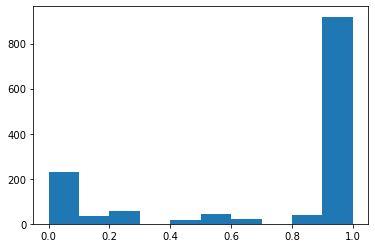

In [134]:
plt.hist(train_corr_data.iloc[:, -8])

In [66]:
train_dataset.iloc[11::24].corr()

발전률    기온(°C)   강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  \
발전률        1.000000 -0.045503 -0.278389  0.274889 -0.694347 -0.333534   
기온(°C)    -0.045503  1.000000  0.052122  0.045063  0.340401  0.862098   
강수량(mm)   -0.278389  0.052122  1.000000 -0.057193  0.269306  0.154401   
풍속(m__s)   0.274889  0.045063 -0.057193  1.000000 -0.367991 -0.092504   
습도(%)     -0.694347  0.340401  0.269306 -0.367991  1.000000  0.665037   
증기압(hPa)  -0.333534  0.862098  0.154401 -0.092504  0.665037  1.000000   
현지기압(hPa)  0.243248 -0.762523 -0.140127 -0.082057 -0.444404 -0.744767   
일조(hr)     0.825940 -0.097514 -0.233534  0.234000 -0.677231 -0.350906   
지면온도(°C)   0.150787  0.923344 -0.021164  0.096005  0.131603  0.700666   
SO2        0.088826 -0.076918 -0.049685 -0.156306 -0.047964 -0.092350   
CO         0.006197 -0.295523 -0.054445 -0.192041 -0.017116 -0.254726   
O3         0.417010  0.455075 -0.106490  0.252548 -0.314136  0.129471   
NO2       -0.115429 -0.263436 -0.035651 -0.396236  0.076301 -0.208521   
PM10       0.148686 -0.153224 -0.140846 -0.171811 -0.170203 -0.242718   
PM25       0.123947 -0.238744 -0.152094 -0.285407 -0.098575 -0.228880   

           현지기압(hPa)    일조(hr)  지면온도(°C)       SO2        CO        O3  \
발전률         0.243248  0.825940  0.150787  0.088826  0.006197  0.417010   
기온(°C)     -0.762523 -0.097514  0.923344 -0.076918 -0.295523  0.455075   
강수량(mm)    -0.140127 -0.233534 -0.021164 -0.049685 -0.054445 -0.106490   
풍속(m__s)   -0.082057  0.234000  0.096005 -0.156306 -0.192041  0.252548   
습도(%)      -0.444404 -0.677231  0.131603 -0.047964 -0.017116 -0.314136   
증기압(hPa)   -0.744767 -0.350906  0.700666 -0.092350 -0.254726  0.129471   
현지기압(hPa)   1.000000  0.299378 -0.672978  0.091158  0.218379 -0.319183   
일조(hr)      0.299378  1.000000  0.103060  0.098433  0.069294  0.346953   
지면온도(°C)   -0.672978  0.103060  1.000000 -0.059382 -0.297675  0.576314   
SO2         0.091158  0.098433 -0.059382  1.000000  0.634209 -0.006280   
CO          0.218379  0.069294 -0.297675  0.634209  1.000000 -0.073102   
O3         -0.319183  0.346953  0.576314 -0.006280 -0.073102  1.000000   
NO2         0.201236 -0.039358 -0.256659  0.636029  0.665708 -0.251882   
PM10        0.183356  0.173756 -0.130745  0.474707  0.559948  0.114479   
PM25        0.269288  0.190233 -0.209072  0.488061  0.623213  0.014055   

                NO2      PM10      PM25  
발전률       -0.115429  0.148686  0.123947  
기온(°C)    -0.263436 -0.153224 -0.238744  
강수량(mm)   -0.035651 -0.140846 -0.152094  
풍속(m__s)  -0.396236 -0.171811 -0.285407  
습도(%)      0.076301 -0.170203 -0.098575  
증기압(hPa)  -0.208521 -0.242718 -0.228880  
현지기압(hPa)  0.201236  0.183356  0.269288  
일조(hr)    -0.039358  0.173756  0.190233  
지면온도(°C)  -0.256659 -0.130745 -0.209072  
SO2        0.636029  0.474707  0.488061  
CO         0.665708  0.559948  0.623213  
O3        -0.251882  0.114479  0.014055  
NO2        1.000000  0.538039  0.613682  
PM10       0.538039  1.000000  0.777270  
PM25       0.613682  0.777270  1.000000

(array([3.4743e+04, 2.2200e+02, 6.5000e+01, 2.0000e+01, 6.0000e+00,
        5.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 0.  ,  5.22, 10.44, 15.66, 20.88, 26.1 , 31.32, 36.54, 41.76,
        46.98, 52.2 ]),
 <BarContainer object of 10 artists>)

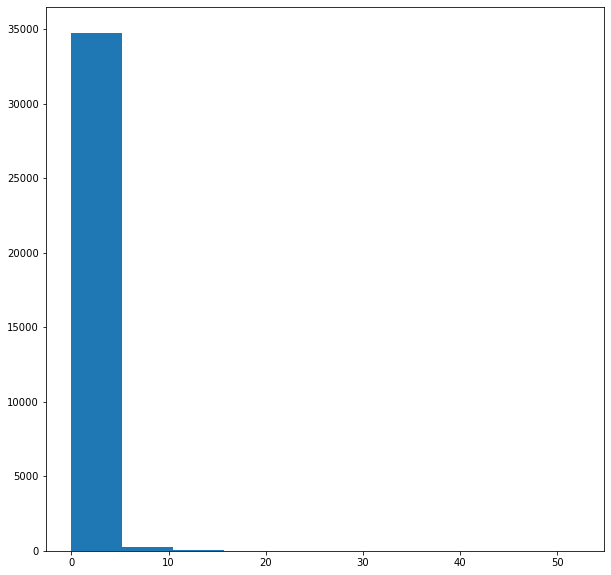

In [78]:
plt.figure(figsize=(10, 10))
# train_dataset.hist()
plt.hist(train_dataset.iloc[:,2])

### 왜 미세먼지 농도와 양의 값으로 비례하는가?
생각해본 이유 : 
- 습도 높으면 흐린거나 비오는 날, 이 경우 미세먼지 농도가 낮게 측정되었을 것으로 예상
- 바람이 강하면 미세먼지 농도 낮고, 발전률 높게 나오는 것이 영향 주지 않나?

제거 한다고 해도 크게 변화 없음....

In [2]:
from torch.utils.data import DataLoader
import torch
from dataset import KORCSVDataset
train_dataset_transform

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



발전률    기온(°C)  강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  현지기압(hPa)  \
측정일시                                                                          
2017010101  0.0  0.225296      0.0  0.000000  0.838710  0.105263   0.888386   
2017010102  0.0  0.213439      0.0  0.012346  0.849462  0.099723   0.883861   
2017010103  0.0  0.211462      0.0  0.000000  0.860215  0.099723   0.889894   
2017010104  0.0  0.203557      0.0  0.012346  0.870968  0.099723   0.892911   
2017010105  0.0  0.201581      0.0  0.037037  0.870968  0.096953   0.883861   
...         ...       ...      ...       ...       ...       ...        ...   
2020123120  0.0  0.274704      0.0  0.419753  0.526882  0.080332   0.799397   
2020123121  0.0  0.268775      0.0  0.370370  0.602151  0.088643   0.803922   
2020123122  0.0  0.274704      0.0  0.296296  0.569892  0.085873   0.802413   
2020123123  0.0  0.254941      0.0  0.061728  0.623656  0.085873   0.805430   
2020123124  0.0  0.211462      0.0  0.074074  0.720430  0.083102   0.815988   

            일조(hr)  지면온도(°C)       SO2        CO     O3       NO2      PM10  \
측정일시                                                                          
2017010101     0.0  0.132561  0.035088  0.266667  0.050  0.224299  0.215054   
2017010102     0.0  0.129987  0.052632  0.266667  0.040  0.252336  0.182796   
2017010103     0.0  0.127413  0.035088  0.233333  0.055  0.196262  0.189964   
2017010104     0.0  0.126126  0.035088  0.233333  0.040  0.186916  0.164875   
2017010105     0.0  0.124839  0.105263  0.266667  0.035  0.214953  0.161290   
...            ...       ...       ...       ...    ...       ...       ...   
2020123120     0.0  0.144144  0.087719  0.133333  0.130  0.112150  0.025090   
2020123121     0.0  0.142857  0.087719  0.100000  0.140  0.093458  0.032258   
2020123122     0.0  0.137709  0.087719  0.133333  0.095  0.158879  0.039427   
2020123123     0.0  0.132561  0.105263  0.133333  0.045  0.233645  0.039427   
2020123124     0.0  0.127413  0.105263  0.133333  0.040  0.242991  0.068100   

                PM25  
측정일시                  
2017010101  0.195489  
2017010102  0.240602  
2017010103  0.218045  
2017010104  0.165414  
2017010105  0.248120  
...              ...  
2020123120  0.000000  
2020123121  0.000000  
2020123122  0.000000  
2020123123  0.015038  
2020123124  0.030075  

[35064 rows x 15 columns]

In [66]:
check_X = train_dataset_transform.iloc[:, 1:].to_numpy()
check_y = train_dataset_transform.iloc[:, 0].to_numpy()

In [64]:
idx=0
import torch

In [70]:
for idx in range(30):
    # print(torch.FloatTensor(check_X[idx:idx+72, :]))
    print(torch.FloatTensor([check_y[idx+72]]))

tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.4599])
tensor([0.0538])
tensor([0.4861])
tensor([1.1168])
tensor([1.4923])
tensor([1.5171])
tensor([0.9148])
tensor([0.1282])
tensor([-0.1410])
tensor([-0.6335])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])
tensor([-0.6690])


In [9]:
hist_len = 72
pred_len = 1

seq_len = hist_len + pred_len
idx_range = len(train_dataset_transform) - seq_len
hidden_size = 512
device='cuda:0' if torch.cuda.is_available() else 'cpu'
epoch = 30

In [10]:
X, y = train_dataset_transform.iloc[:, 1:], train_dataset_transform.iloc[:,0]

In [11]:
from models import CNN1, DNN1
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F
# model = DNN1(hist_len=hist_len, pred_len=pred_len, input_size=X.shape[1], hidden_size=hidden_size, num_layers=None, device=device)

In [12]:
idx = 0
temp_X = X.iloc[idx:idx+hist_len, :]
temp_y = y.iloc[idx+seq_len]

In [82]:
result_df.iloc[0, :] = 0, 0

NameError: name 'result_df' is not defined

In [83]:
out.item()

NameError: name 'out' is not defined

In [8]:
avg_loss

NameError: name 'avg_loss' is not defined

In [84]:
model.to(device)
model.train()
train_loss = 0.0
result_df = pd.DataFrame(columns=['model_prediction', 'real_value'], index=X.index)
# result_idx = args.hist_len
optimizer = optim.Adam(model.parameters(), lr=0.001)
backprop = True

cnt = 0
# for idx, data in enumerate(train_batch):
# for epoch_num in range(epoch):
for idx in range(0, idx_range): #예측 위해서 마지막 하나 제거
    # x, y = data[:, :args.hist_len, :].to(device), data[:,args.hist_len:,0].to(device)     #x : batch_size * seq_len * input_size
    temp_X = torch.FloatTensor(X.iloc[idx:idx+hist_len, :].values).to(device)
    temp_y = torch.FloatTensor([y.iloc[idx+seq_len]]).to(device)
    # print(cnt, ' ', end='')
    # print(data.size())
    # print(x.size())
    optimizer.zero_grad()
    out = model(temp_X)
    loss = F.mse_loss(out.float(), temp_y.float())
    
    result_df.iloc[idx+seq_len, :] = out.cpu().detach().numpy().item(), temp_y.cpu().detach().numpy().item()

    # result_df.to_numpy()[result_idx:result_idx+args.batch_size, :] = np.vstack((out[:,0].cpu().detach().numpy(),y[:,0].cpu().detach().numpy())).T
    # result_idx+=args.batch_size
    if backprop:
        loss.backward()
        optimizer.step()
    train_loss += loss.item()
    cnt+=1
# size = len(train_batch.dataset)
# print(f"size : {size}")
avg_loss = train_loss/idx_range
# return avg_loss, result_df

f:\OneDrive - 고려대학교\내 드라이브\고려대학교\VS_Projects_Graduate\Projects\Local_Solar_Ratio\models.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype = torch.float32)
<ipython-input-84-9e757b46971f>:21: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(out.float(), temp_y.float())


In [86]:
torch.save(model, "./test_model.pt")

In [18]:
import torch
device = torch.device('cuda')
model_loaded = torch.load('./test_model.pt').to(device)

In [20]:
for idx in range(0, idx_range):
    temp_X = torch.FloatTensor(X.iloc[idx:idx+hist_len, :].values).to(device)
    temp_y = torch.FloatTensor([y.iloc[idx+seq_len]]).to(device)
    print(model_loaded(temp_X))
        
    if idx == 5:
        break

tensor([[0.5712]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[0.8544]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[1.0759]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[1.1118]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[0.9228]], device='cuda:0', grad_fn=<AddmmBackward>)
tensor([[0.5821]], device='cuda:0', grad_fn=<AddmmBackward>)


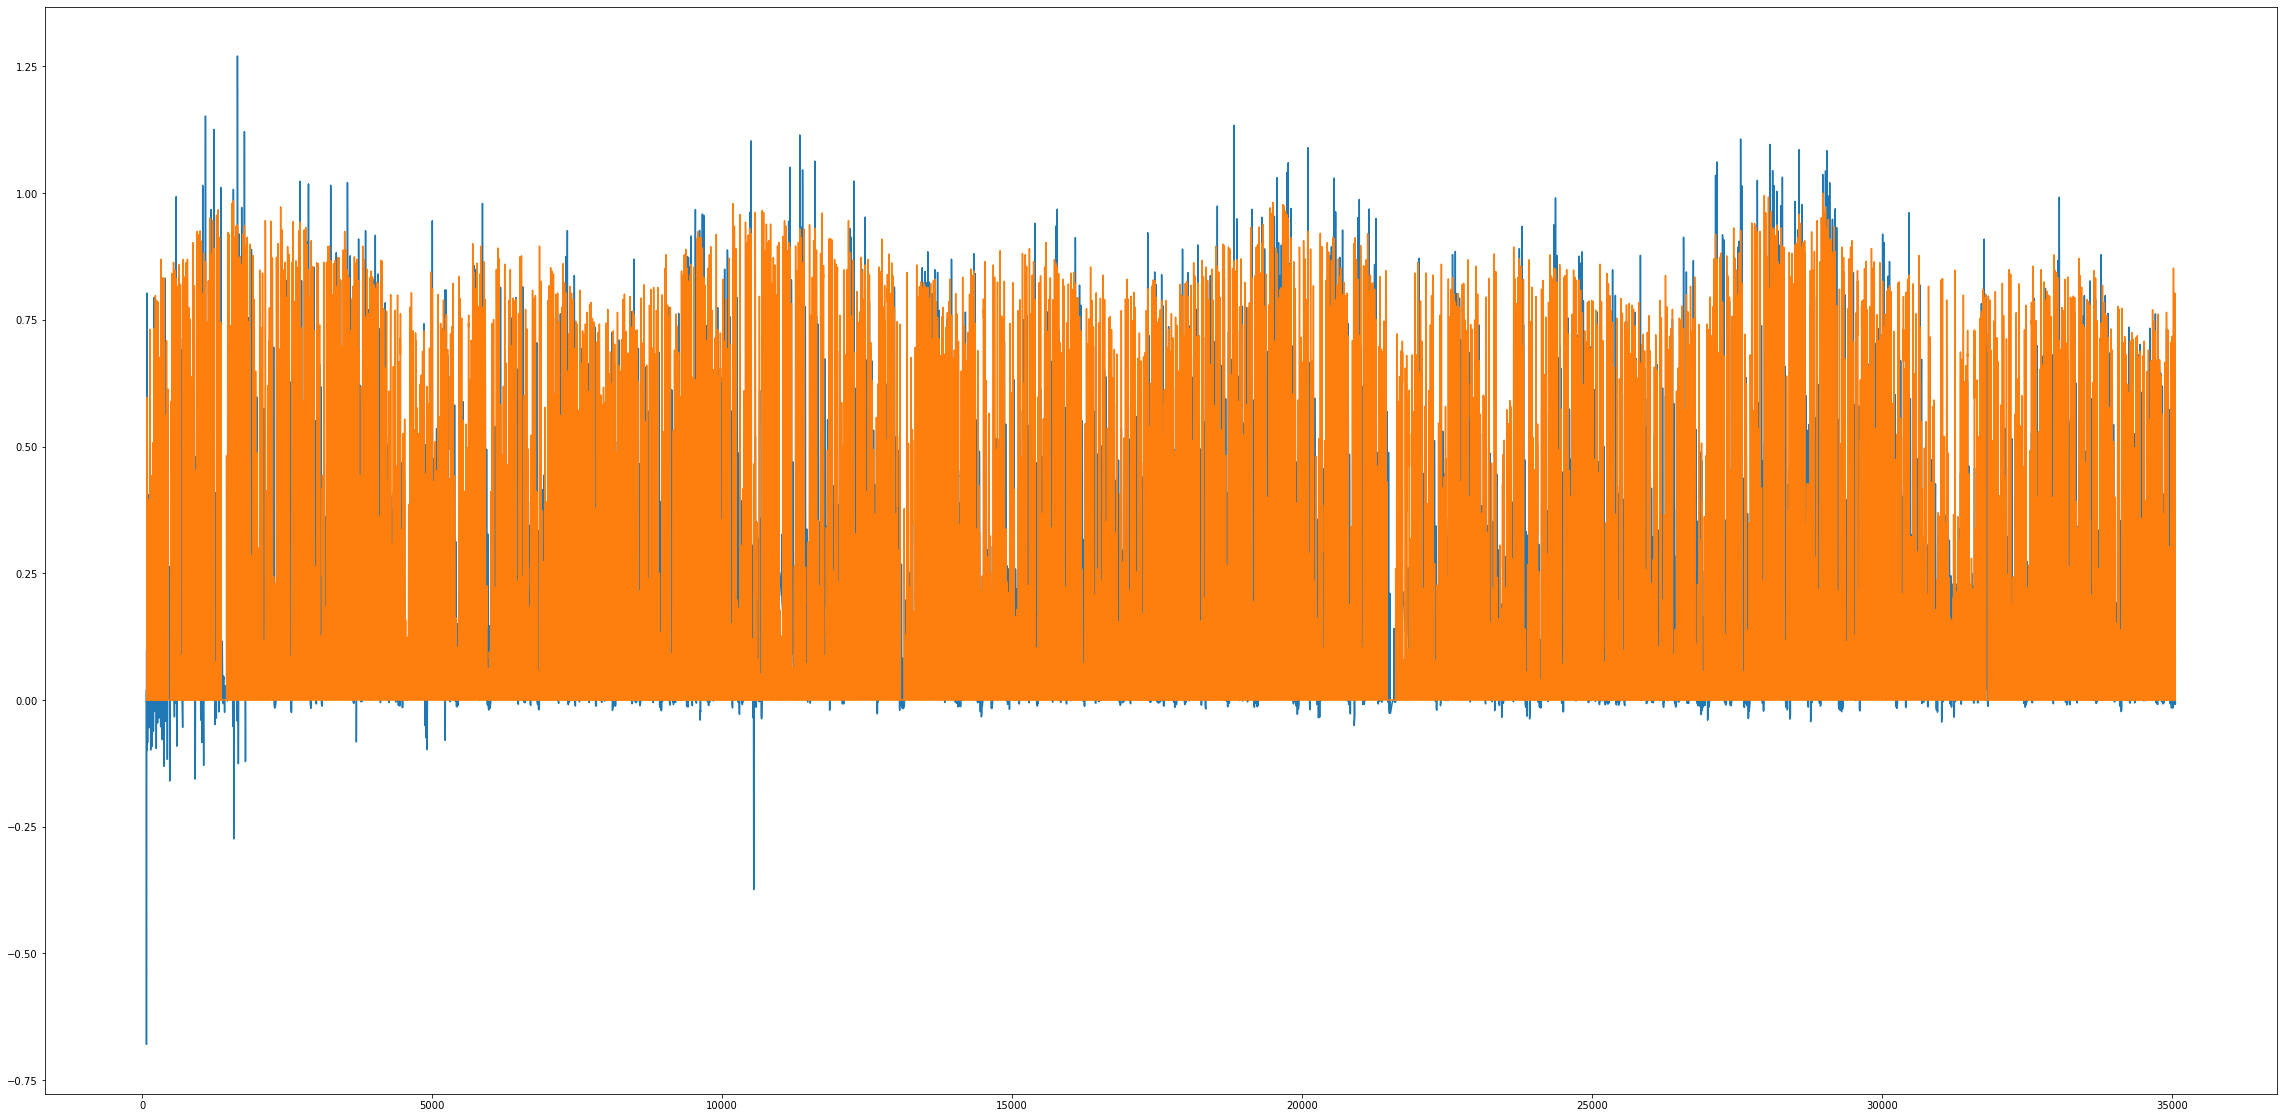

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(40,20))

plt.plot([i for i in range(len(result_df))],result_df)

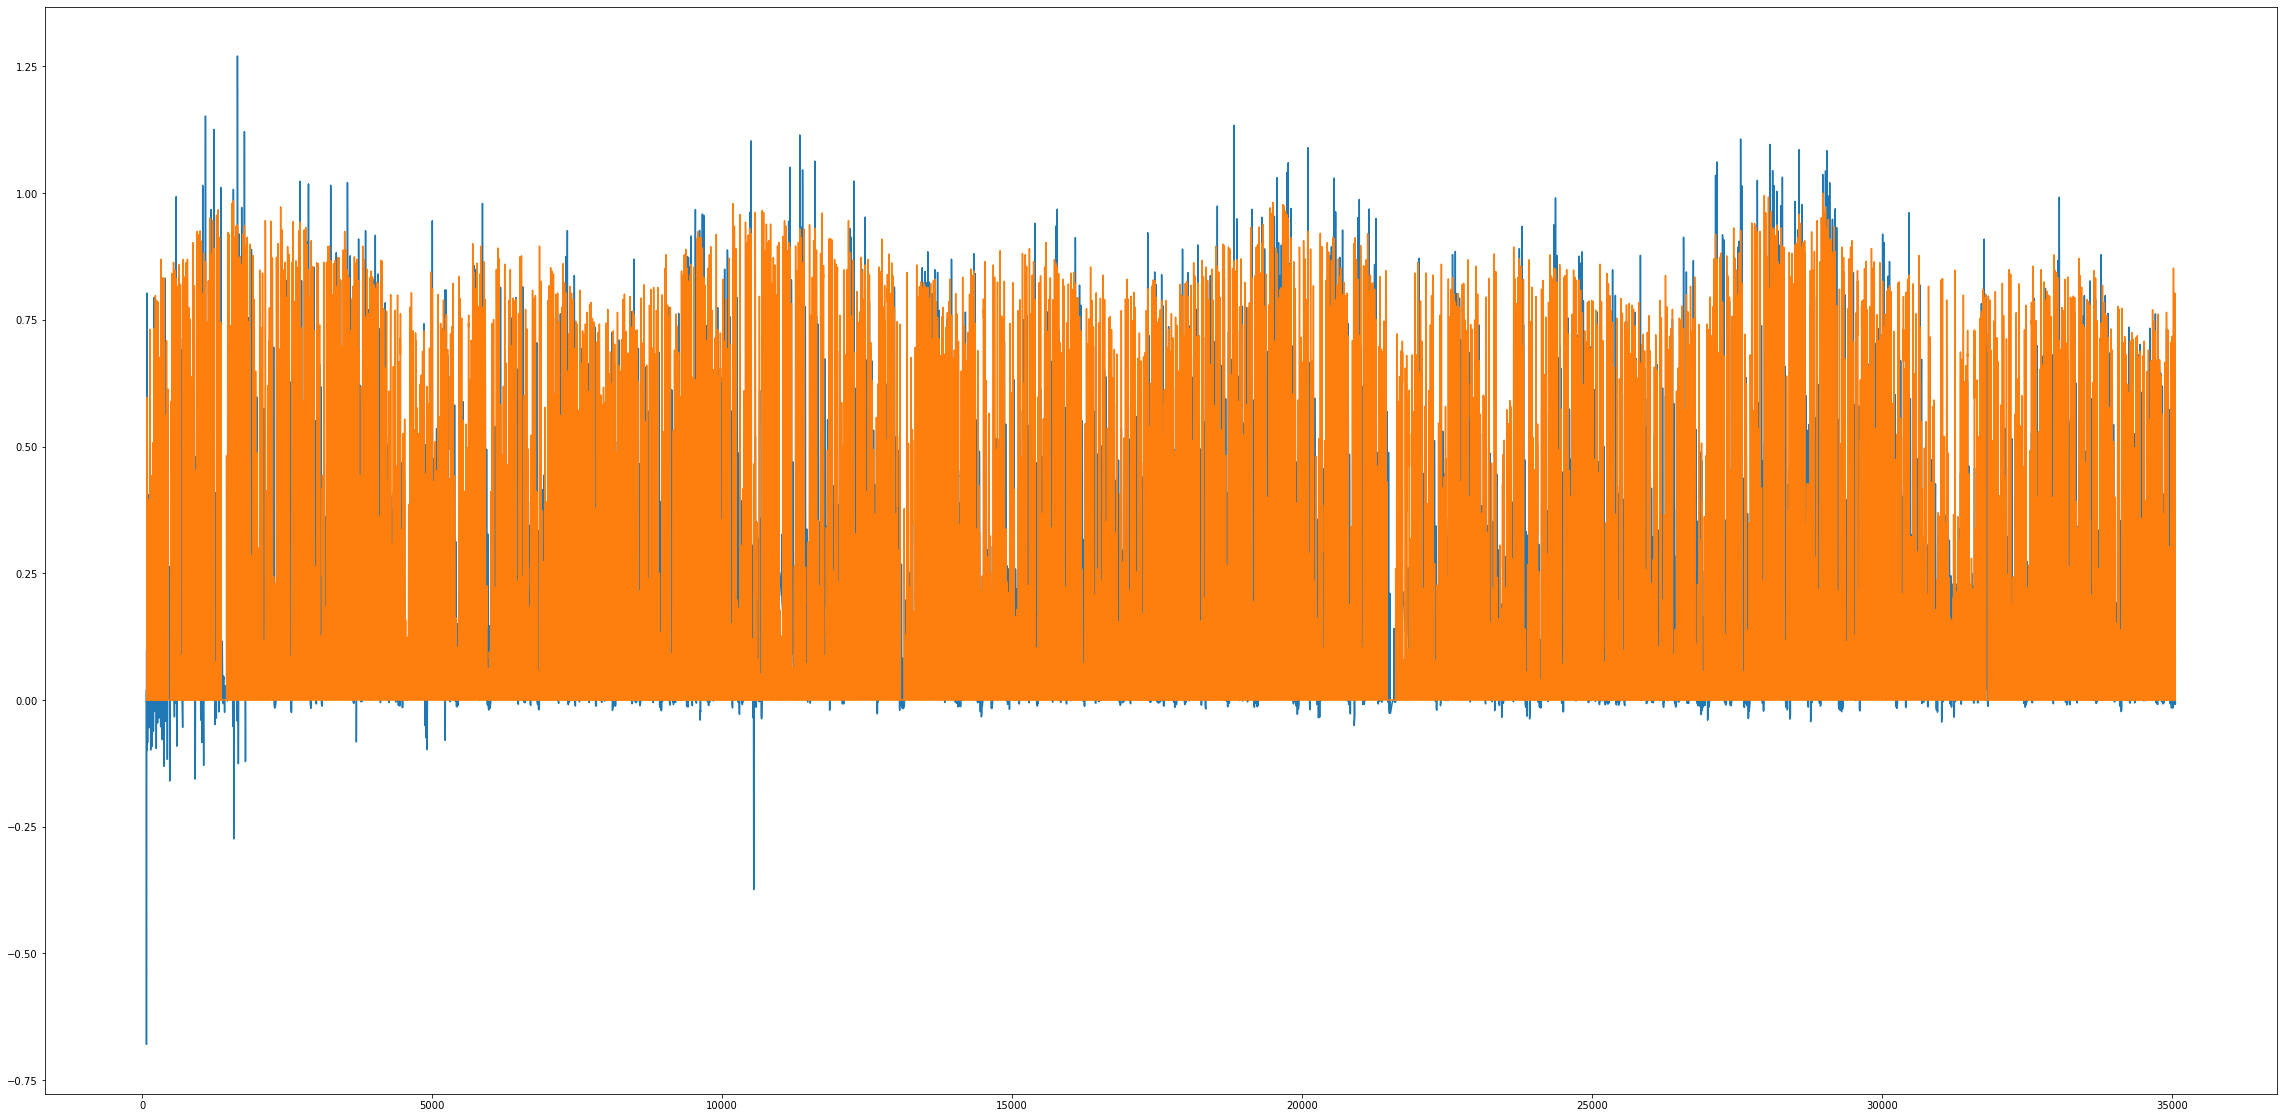

In [14]:
plt.figure(figsize=(40,20))
plt.plot([i for i in range(len(result_df))],result_df)

In [12]:
result_df

model_prediction real_value
측정일시                                  
2017010101              NaN        NaN
2017010102              NaN        NaN
2017010103              NaN        NaN
2017010104              NaN        NaN
2017010105              NaN        NaN
...                     ...        ...
2020123120        -0.007473        0.0
2020123121        -0.007054        0.0
2020123122        -0.006643        0.0
2020123123        -0.006242        0.0
2020123124        -0.005851        0.0

[35064 rows x 2 columns]

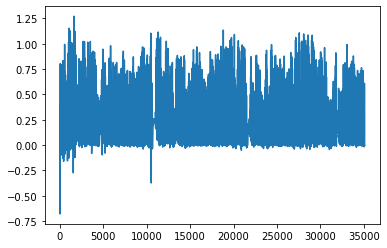

In [13]:
plt.plot([i for i in range(len(result_df))],result_df.iloc[:,0])

In [109]:
for idx in range(0, idx_range+1):
    temp_data = train_dataset_transform.iloc[idx:idx+seq_len, :]
    print(temp_data)
    print(len(temp_data))
    


            발전률    기온(°C)  강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  현지기압(hPa)  \
측정일시                                                                          
2017010101  0.0  0.225296      0.0  0.000000  0.838710  0.105263   0.888386   
2017010102  0.0  0.213439      0.0  0.012346  0.849462  0.099723   0.883861   
2017010103  0.0  0.211462      0.0  0.000000  0.860215  0.099723   0.889894   
2017010104  0.0  0.203557      0.0  0.012346  0.870968  0.099723   0.892911   
2017010105  0.0  0.201581      0.0  0.037037  0.870968  0.096953   0.883861   
...         ...       ...      ...       ...       ...       ...        ...   
2017010721  0.0  0.405138      0.0  0.049383  0.591398  0.152355   0.717949   
2017010722  0.0  0.411067      0.0  0.049383  0.548387  0.144044   0.716440   
2017010723  0.0  0.399209      0.0  0.024691  0.602151  0.152355   0.717949   
2017010724  0.0  0.387352      0.0  0.024691  0.655914  0.155125   0.716440   
2017010801  0.0  0.377470      0.0  0.049383  0.6666

In [8]:
CSVDataset = KORCSVDataset(train_dataset_transform, locals=None, seq_len=169, norm='MinMax')

2017010101


In [60]:
train_dataset_transform

발전률    기온(°C)   강수량(mm)  풍속(m__s)     습도(%)  증기압(hPa)  \
측정일시                                                                     
2017010101 -0.668959 -1.585641 -0.137155 -1.071153  0.787192 -0.935666   
2017010102 -0.668959 -1.644833 -0.137155 -0.970346  0.830103 -0.958704   
2017010103 -0.668959 -1.654699 -0.137155 -1.071153  0.873015 -0.958704   
2017010104 -0.668959 -1.694160 -0.137155 -0.970346  0.915926 -0.958704   
2017010105 -0.668959 -1.704025 -0.137155 -0.768730  0.915926 -0.970222   
...              ...       ...       ...       ...       ...       ...   
2020123120 -0.668959 -1.339008 -0.137155  2.356307 -0.457236 -1.039334   
2020123121 -0.668959 -1.368604 -0.137155  1.953076 -0.156857 -1.004778   
2020123122 -0.668959 -1.339008 -0.137155  1.348230 -0.285591 -1.016297   
2020123123 -0.668959 -1.437662 -0.137155 -0.567115 -0.071034 -1.016297   
2020123124 -0.668959 -1.654699 -0.137155 -0.466307  0.315168 -1.027815   

            현지기압(hPa)    일조(hr)  지면온도(°C)       SO2        CO        O3  \
측정일시                                                                      
2017010101   1.729930 -0.682611 -1.345272 -0.876076  1.470439 -1.021550   
2017010102   1.691923 -0.682611 -1.360765 -0.562440  1.470439 -1.117474   
2017010103   1.742599 -0.682611 -1.376259 -0.876076  0.967312 -0.973588   
2017010104   1.767937 -0.682611 -1.384005 -0.876076  0.967312 -1.117474   
2017010105   1.691923 -0.682611 -1.391752  0.378467  1.470439 -1.165437   
...               ...       ...       ...       ...       ...       ...   
2020123120   0.982463 -0.682611 -1.275552  0.064831 -0.542070 -0.254154   
2020123121   1.020470 -0.682611 -1.283298  0.064831 -1.045197 -0.158230   
2020123122   1.007801 -0.682611 -1.314285  0.064831 -0.542070 -0.589890   
2020123123   1.033139 -0.682611 -1.345272  0.378467 -0.542070 -1.069512   
2020123124   1.121821 -0.682611 -1.376259  0.378467 -0.542070 -1.117474   

                 NO2      PM10      PM25  
측정일시                                      
2017010101  0.600040  0.845176  0.795995  
2017010102  0.895305  0.455182  1.298999  
2017010103  0.304775  0.541848  1.047497  
2017010104  0.206353  0.238519  0.460659  
2017010105  0.501618  0.195186  1.382833  
...              ...       ...       ...  
2020123120 -0.581020 -1.451456 -1.383689  
2020123121 -0.777864 -1.364790 -1.383689  
2020123122 -0.088912 -1.278125 -1.383689  
2020123123  0.698462 -1.278125 -1.216021  
2020123124  0.796884 -0.931464 -1.048353  

[35064 rows x 15 columns]

In [220]:
torch.load(glob.glob('./models/*model_0.pt')[0]).to(device)     #경상대


PermissionError: [Errno 13] Permission denied: '.'

In [80]:
from utils import *
convert_2d(X.index[0])

(0.9998518392091162,
 0.017213356155834685,
 0.9659258262890683,
 0.25881904510252074)

In [10]:
torch_tensor = torch.tensor(train_dataset_transform.values)


In [23]:
torch_tensor

tensor([[0.0000, 0.2253, 0.0000,  ..., 0.2243, 0.2151, 0.1955],
        [0.0000, 0.2134, 0.0000,  ..., 0.2523, 0.1828, 0.2406],
        [0.0000, 0.2115, 0.0000,  ..., 0.1963, 0.1900, 0.2180],
        ...,
        [0.0000, 0.2747, 0.0000,  ..., 0.1589, 0.0394, 0.0000],
        [0.0000, 0.2549, 0.0000,  ..., 0.2336, 0.0394, 0.0150],
        [0.0000, 0.2115, 0.0000,  ..., 0.2430, 0.0681, 0.0301]],
       dtype=torch.float64)

In [60]:
train_loader = DataLoader(torch_tensor, batch_size=169, drop_last=True)
# train_loader = DataLoader(CSVDataset, batch_size=32, drop_last=True)

In [61]:
for idx, data in enumerate(train_loader):
    print(idx)
    print(data.shape)
    break

0
torch.Size([169, 15])


In [88]:

train_dataset_transform.corr()['발전률']

발전률          1.000000
기온(°C)       0.243226
강수량(mm)     -0.075952
풍속(m__s)     0.410628
습도(%)       -0.503371
증기압(hPa)    -0.057038
현지기압(hPa)    0.012563
일조(hr)       0.805358
지면온도(°C)     0.450913
SO2          0.149228
CO          -0.040481
O3           0.453621
NO2         -0.173898
PM10         0.085280
PM25         0.147652
Name: 발전률, dtype: float64

In [261]:
result = pd.read_csv("./result/20220419100933_hist72_pred1_modelDNN1_epoch10_trainBusan/pred_result_5.csv", index_col = 0)


In [262]:
result

model_prediction  model_prediction.1  model_prediction.2  \
측정일시                                                                   
2017010101               NaN                 NaN                 NaN   
2017010102               NaN                 NaN                 NaN   
2017010103               NaN                 NaN                 NaN   
2017010104               NaN                 NaN                 NaN   
2017010105               NaN                 NaN                 NaN   
...                      ...                 ...                 ...   
2020123120         -0.661944           -0.608695           -0.658727   
2020123121         -0.649550           -0.608695           -0.657261   
2020123122         -0.639310           -0.608695           -0.656175   
2020123123         -0.632252           -0.608695           -0.656718   
2020123124         -0.631198           -0.608695           -0.658480   

            model_prediction.3  model_prediction.4  model_prediction.5  \
측정일시                                                                     
2017010101                 NaN                 NaN                 NaN   
2017010102                 NaN                 NaN                 NaN   
2017010103                 NaN                 NaN                 NaN   
2017010104                 NaN                 NaN                 NaN   
2017010105                 NaN                 NaN                 NaN   
...                        ...                 ...                 ...   
2020123120           -0.637697           -0.634053           -0.653111   
2020123121           -0.638035           -0.638013           -0.648653   
2020123122           -0.639628           -0.641365           -0.648460   
2020123123           -0.641168           -0.644251           -0.648317   
2020123124           -0.642137           -0.644406           -0.648590   

            real_value  final_prediction  
측정일시                                      
2017010101         NaN               NaN  
2017010102         NaN               NaN  
2017010103         NaN               NaN  
2017010104         NaN               NaN  
2017010105         NaN               NaN  
...                ...               ...  
2020123120   -0.634853         -0.644508  
2020123121   -0.634853         -0.641560  
2020123122   -0.634853         -0.639931  
2020123123   -0.634853         -0.639196  
2020123124   -0.634853         -0.639515  

[35064 rows x 8 columns]

In [275]:
import arrow
print(arrow.now())
print(arrow.now())

2022-04-19T12:42:56.604473+09:00
2022-04-19T12:42:56.604473+09:00


In [351]:
result.iloc[30000:32000, :]

model_prediction  model_prediction.1  model_prediction.2  \
측정일시                                                                   
2020060401         -0.675157           -0.608786           -0.658905   
2020060402         -0.679965           -0.608793           -0.657271   
2020060403         -0.683556           -0.608806           -0.656729   
2020060404         -0.681333           -0.608831           -0.659624   
2020060405         -0.685589           -0.608844           -0.660894   
...                      ...                 ...                 ...   
2020082604         -0.694658           -0.608860           -0.644498   
2020082605         -0.687743           -0.608877           -0.641637   
2020082606         -0.663603           -0.608863           -0.627547   
2020082607         -0.577100           -0.608766           -0.566040   
2020082608         -0.372978           -0.608695           -0.337999   

            model_prediction.3  model_prediction.4  model_prediction.5  \
측정일시                                                                     
2020060401           -0.608163           -0.657860           -0.644604   
2020060402           -0.609954           -0.657409           -0.643468   
2020060403           -0.611602           -0.660140           -0.642091   
2020060404           -0.611154           -0.661232           -0.642128   
2020060405           -0.611207           -0.660309           -0.643168   
...                        ...                 ...                 ...   
2020082604           -0.614788           -0.683018           -0.645379   
2020082605           -0.616569           -0.684203           -0.646775   
2020082606           -0.605705           -0.663591           -0.641402   
2020082607           -0.584037           -0.592833           -0.612320   
2020082608           -0.557743           -0.420967           -0.580436   

            real_value  final_prediction  
측정일시                                      
2020060401   -0.634853         -0.644533  
2020060402   -0.634853         -0.645319  
2020060403   -0.634853         -0.646449  
2020060404   -0.634853         -0.646588  
2020060405   -0.634853         -0.647753  
...                ...               ...  
2020082604   -0.634853         -0.651065  
2020082605   -0.634853         -0.649789  
2020082606   -0.634853         -0.636447  
2020082607   -0.578035         -0.588496  
2020082608   -0.390744         -0.469892  

[2000 rows x 8 columns]

D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


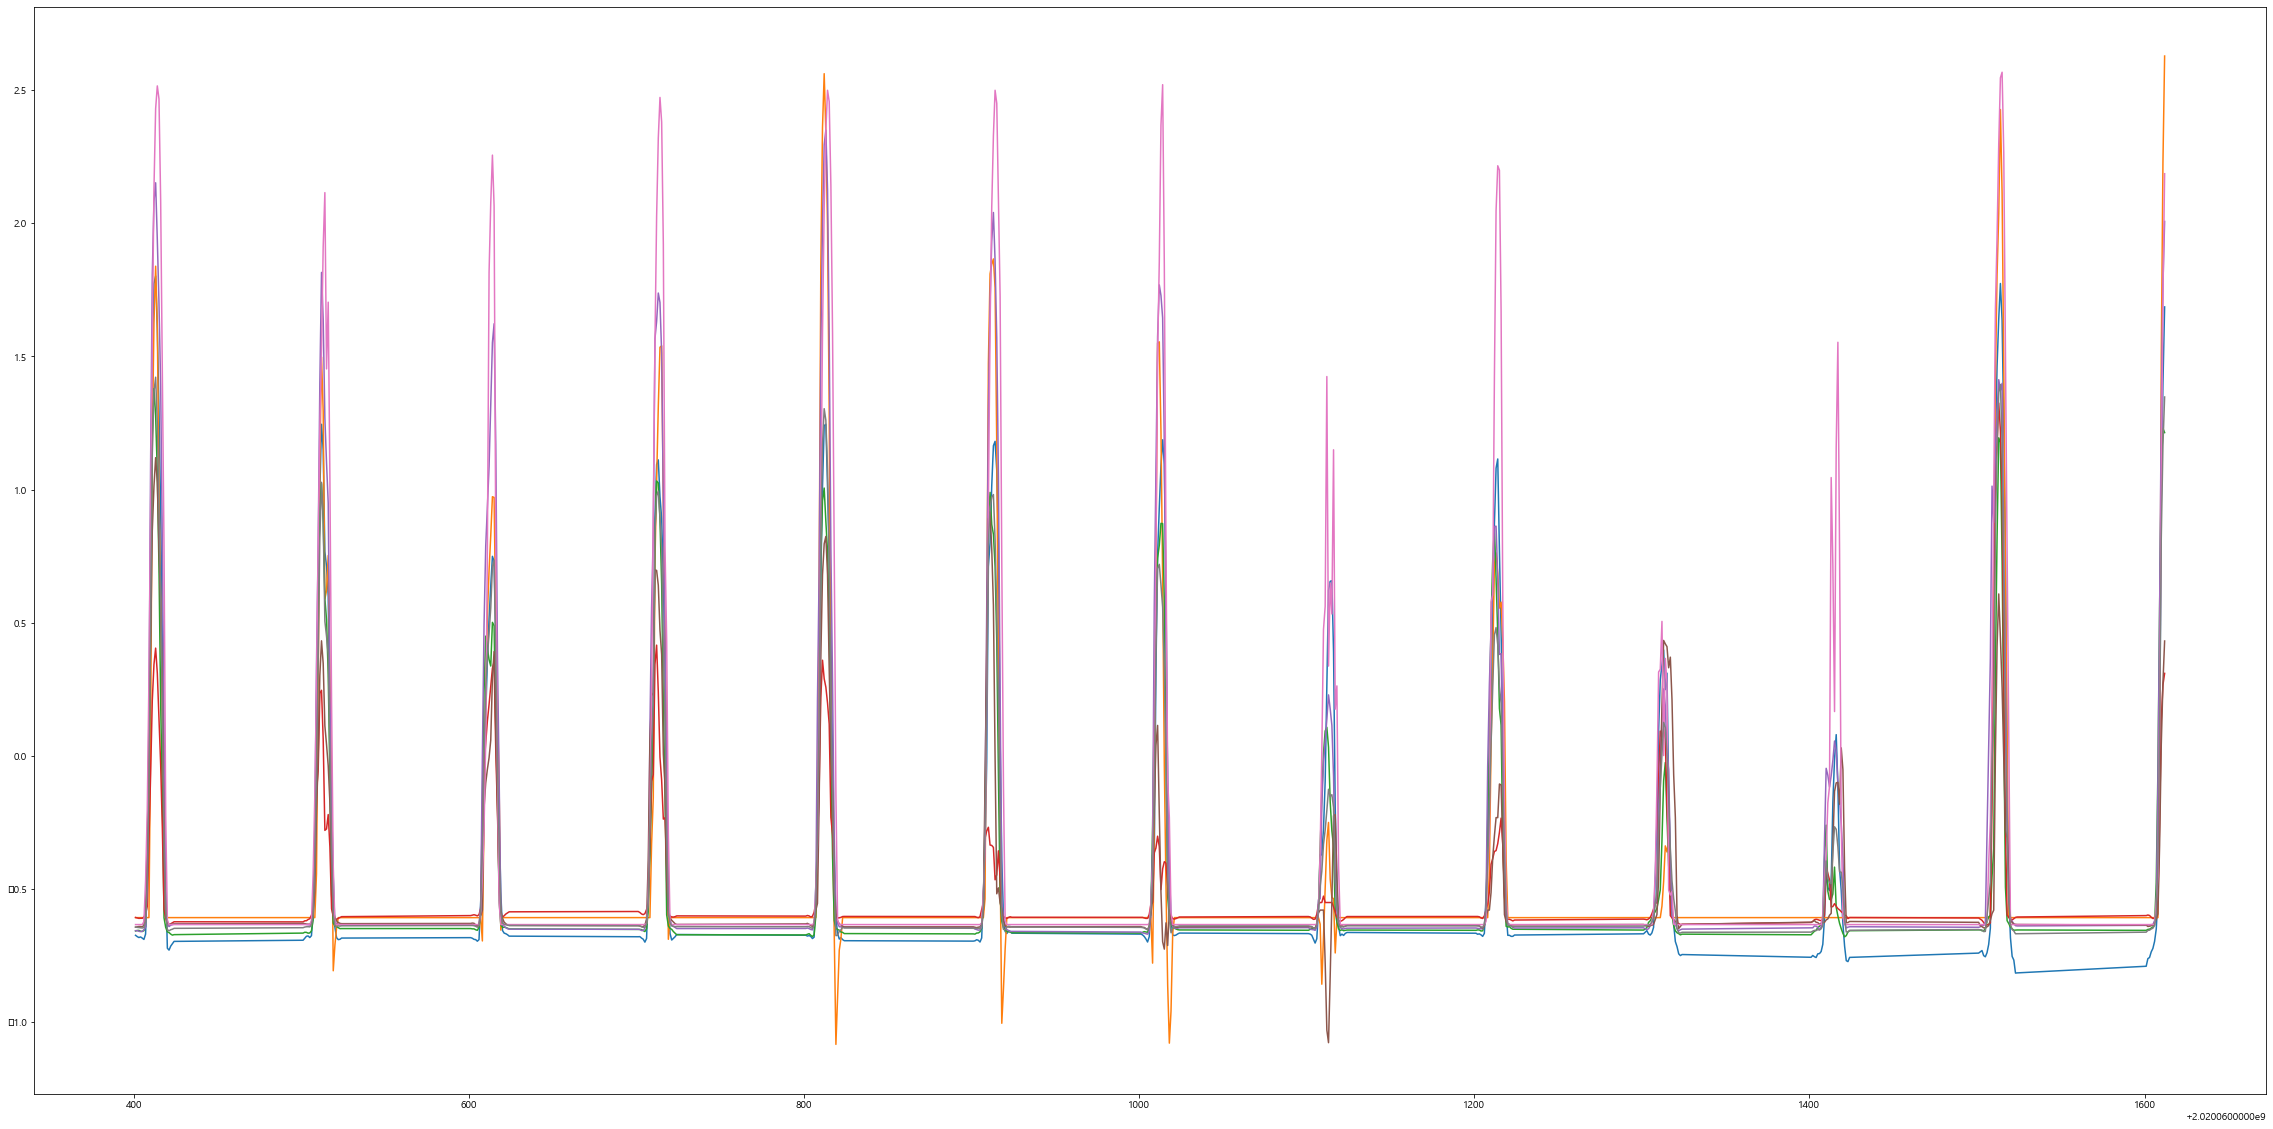

In [352]:
plt.figure(figsize=(40,20))
plt.plot(result.iloc[30000:30300, :])

In [59]:
len(glob.glob(os.path.join(os.getcwd(), 'result/20220415142614_hist72_pred1_modelDNN1_epoch5_trainBusan/*.pt')))

7

In [237]:
result_0 = pd.read_csv("./result/20220418192524_hist72_pred1_modelDNN1_epoch10_trainBusan/pred_result_0.csv", index_col=0)

In [232]:
arbit_weight = pd.DataFrame([[0.2,0.3,0.1,0.15,0.2,0.05]])

In [276]:
dataset_0 = pd.read_csv(f'./dataset/solar_weather_2017_2020_경상대.csv', encoding='cp949', index_col=0)
dataset_1 = pd.read_csv(f'./dataset/solar_weather_2017_2020_남제주소내.csv', encoding='cp949', index_col=0)
dataset_2 = pd.read_csv(f'./dataset/solar_weather_2017_2020_부산복합자재창고.csv', encoding='cp949', index_col=0)
dataset_3 = pd.read_csv(f'./dataset/solar_weather_2017_2020_영월본부.csv', encoding='cp949', index_col=0)
dataset_4 = pd.read_csv(f'./dataset/solar_weather_2017_2020_인천수산정수장.csv', encoding='cp949', index_col=0)
dataset_5 = pd.read_csv(f'./dataset/solar_weather_2017_2020_하동보건소.csv', encoding='cp949', index_col=0)
dataset_6 = pd.read_csv(f'./dataset/solar_weather_2017_2020_신안.csv', encoding='cp949', index_col=0)

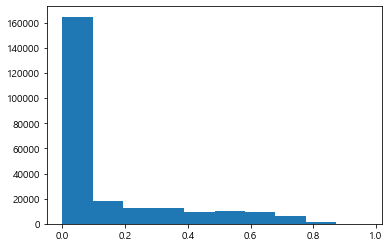

In [311]:

solar_dataset = pd.concat([dataset_0['발전률'], dataset_1['발전률'], dataset_2['발전률'], dataset_3['발전률'], dataset_4['발전률'], dataset_5['발전률'], dataset_6['발전률']])
solar_dataset = pd.DataFrame(solar_dataset)
plt.hist(solar_dataset)
solar_dataset_transform = solar_dataset.copy()

array([[<AxesSubplot:title={'center':'발전률'}>]], dtype=object)

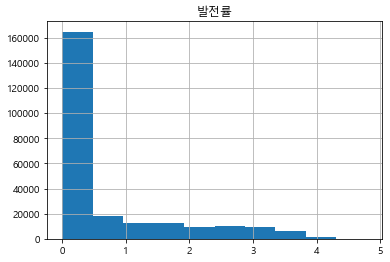

In [316]:
solar_scaler = RobustScaler()
solar_dataset_transform[:] = solar_scaler.fit_transform(solar_dataset)
solar_dataset_transform.hist()

D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


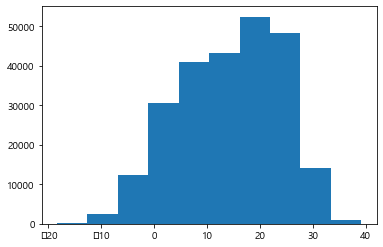

In [315]:
temp_dataset = pd.concat([dataset_0['기온(°C)'], dataset_1['기온(°C)'], dataset_2['기온(°C)'], dataset_3['기온(°C)'], dataset_4['기온(°C)'], dataset_5['기온(°C)'], dataset_6['기온(°C)']])
temp_dataset = pd.DataFrame(temp_dataset)
plt.hist(temp_dataset)
temp_dataset_transform = temp_dataset.copy()

array([[<AxesSubplot:title={'center':'기온(°C)'}>]], dtype=object)

D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


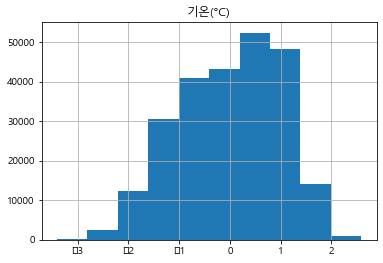

In [318]:
temp_scaler = StandardScaler()
temp_dataset_transform[:] = temp_scaler.fit_transform(temp_dataset)
temp_dataset_transform.hist()

In [84]:
dataset_0 = pd.read_csv(f'./dataset/solar_weather_2017_2020_경상대.csv', encoding='cp949', index_col=0)
dataset_1 = pd.read_csv(f'./dataset/solar_weather_2017_2020_남제주소내.csv', encoding='cp949', index_col=0)
dataset_2 = pd.read_csv(f'./dataset/solar_weather_2017_2020_부산복합자재창고.csv', encoding='cp949', index_col=0)
dataset_3 = pd.read_csv(f'./dataset/solar_weather_2017_2020_영월본부.csv', encoding='cp949', index_col=0)
dataset_4 = pd.read_csv(f'./dataset/solar_weather_2017_2020_인천수산정수장.csv', encoding='cp949', index_col=0)
dataset_5 = pd.read_csv(f'./dataset/solar_weather_2017_2020_하동보건소.csv', encoding='cp949', index_col=0)
dataset_6 = pd.read_csv(f'./dataset/solar_weather_2017_2020_신안.csv', encoding='cp949', index_col=0)

def data_scale(data, norm):
    if norm == "MinMax":
        scaler = MinMaxScaler()
    elif norm == "Standard":
        scaler = StandardScaler()
    elif norm == "Robust":
        scaler = RobustScaler()
        
    else:
        NotImplementedError('wrong scaler type')
    data_transform = data.copy()
    data_transform[:] = scaler.fit_transform(data)
    return data_transform

In [85]:
dataset = pd.concat([dataset_0, dataset_1, dataset_2, dataset_3, dataset_4, dataset_5, dataset_6], axis=0)


In [86]:
data_scale(dataset, 'Standard').describe().round(6)

NameError: name 'StandardScaler' is not defined

In [87]:
data_scale(dataset, 'Robust').describe()

NameError: name 'RobustScaler' is not defined

In [335]:
data_scale(dataset, "MinMax").describe()

발전률         기온(°C)        강수량(mm)       풍속(m__s)  \
count  245448.000000  245448.000000  245448.000000  245448.000000   
mean        0.137235       0.568263       0.001743       0.106213   
std         0.219758       0.166819       0.014406       0.086436   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.439236       0.000000       0.038674   
50%         0.000000       0.583333       0.000000       0.088398   
75%         0.208757       0.704861       0.000000       0.149171   
max         1.000000       1.000000       1.000000       1.000000   

               습도(%)       증기압(hPa)      현지기압(hPa)         일조(hr)  \
count  245448.000000  245448.000000  245448.000000  245448.000000   
mean        0.665717       0.297070       0.684028       0.277381   
std         0.224579       0.210707       0.121509       0.417715   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.505155       0.118056       0.614173       0.000000   
50%         0.680412       0.243056       0.695163       0.000000   
75%         0.865979       0.451389       0.773903       0.700000   
max         1.000000       1.000000       1.000000       1.000000   

            지면온도(°C)            SO2             CO             O3  \
count  245448.000000  245448.000000  245448.000000  245448.000000   
mean        0.376285       0.016198       0.080221       0.143468   
std         0.155387       0.012509       0.047190       0.089907   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.251557       0.008299       0.051724       0.076190   
50%         0.377335       0.012448       0.068966       0.138095   
75%         0.481943       0.020747       0.103448       0.200000   
max         1.000000       1.000000       1.000000       1.000000   

                 NO2           PM10           PM25  
count  245448.000000  245448.000000  245448.000000  
mean        0.157557       0.087315       0.114339  
std         0.114899       0.057508       0.087427  
min         0.000000       0.000000       0.000000  
25%         0.068966       0.047619       0.054945  
50%         0.129310       0.074830       0.093407  
75%         0.215517       0.111111       0.153846  
max         1.000000       1.000000       1.000000

In [350]:
dataset.iloc[:35064]

발전률  기온(°C)  강수량(mm)  풍속(m__s)  습도(%)  증기압(hPa)  현지기압(hPa)  \
측정일시                                                                     
2017010101  0.0    -2.4      0.0       0.0   85.0       4.4     1026.5   
2017010102  0.0    -3.0      0.0       0.1   86.0       4.2     1026.2   
2017010103  0.0    -3.1      0.0       0.0   87.0       4.2     1026.6   
2017010104  0.0    -3.5      0.0       0.1   88.0       4.2     1026.8   
2017010105  0.0    -3.6      0.0       0.3   88.0       4.1     1026.2   
...         ...     ...      ...       ...    ...       ...        ...   
2020123120  0.0     0.1      0.0       3.4   56.0       3.5     1020.6   
2020123121  0.0    -0.2      0.0       3.0   63.0       3.8     1020.9   
2020123122  0.0     0.1      0.0       2.4   60.0       3.7     1020.8   
2020123123  0.0    -0.9      0.0       0.5   65.0       3.7     1021.0   
2020123124  0.0    -3.1      0.0       0.6   74.0       3.6     1021.7   

            일조(hr)  지면온도(°C)    SO2   CO     O3    NO2  PM10  PM25  
측정일시                                                                
2017010101     0.0      -1.3  0.002  0.8  0.010  0.024  60.0  26.0  
2017010102     0.0      -1.5  0.003  0.8  0.008  0.027  51.0  32.0  
2017010103     0.0      -1.7  0.002  0.7  0.011  0.021  53.0  29.0  
2017010104     0.0      -1.8  0.002  0.7  0.008  0.020  46.0  22.0  
2017010105     0.0      -1.9  0.006  0.8  0.007  0.023  45.0  33.0  
...            ...       ...    ...  ...    ...    ...   ...   ...  
2020123120     0.0      -0.4  0.005  0.4  0.026  0.012   7.0   0.0  
2020123121     0.0      -0.5  0.005  0.3  0.028  0.010   9.0   0.0  
2020123122     0.0      -0.9  0.005  0.4  0.019  0.017  11.0   0.0  
2020123123     0.0      -1.3  0.006  0.4  0.009  0.025  11.0   2.0  
2020123124     0.0      -1.7  0.006  0.4  0.008  0.026  19.0   4.0  

[35064 rows x 15 columns]

In [89]:
import pandas as pd
pred_result_0 = pd.read_csv(os.path.join('.', 'result', '20220421133455_hist72_pred1_modelDNN1_epoch30_trainBusan', 'pred_result_0.csv'), encoding='cp949', index_col=0)

d:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
pred_result_0.columns

Index(['model_prediction', 'model_prediction.1', 'model_prediction.2',
       'model_prediction.3', 'model_prediction.4', 'model_prediction.5',
       'real_value', 'final_prediction', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [91]:
pred_result_0 = pred_result_0.loc[:,['model_prediction', 'model_prediction.1', 'model_prediction.2',
       'model_prediction.3', 'model_prediction.4', 'model_prediction.5',
       'real_value', 'final_prediction']]

In [92]:
pred_result_0.index - 1

Int64Index([2017010100, 2017010101, 2017010102, 2017010103, 2017010104,
            2017010105, 2017010106, 2017010107, 2017010108, 2017010109,
            ...
            2020123114, 2020123115, 2020123116, 2020123117, 2020123118,
            2020123119, 2020123120, 2020123121, 2020123122, 2020123123],
           dtype='int64', name='date', length=35064)

In [93]:
import datetime
datetime.datetime.strptime(str(pred_result_0.index), '%Y%M%d%H')

ValueError: time data "Int64Index([2017010101, 2017010102, 2017010103, 2017010104, 2017010105,\n            2017010106, 2017010107, 2017010108, 2017010109, 2017010110,\n            ...\n            2020123115, 2020123116, 2020123117, 2020123118, 2020123119,\n            2020123120, 2020123121, 2020123122, 2020123123, 2020123124],\n           dtype='int64', name='date', length=35064)" does not match format '%Y%M%d%H'

In [94]:
pred_result_0.index[0]

2017010101

In [95]:
import datetime
date_index = [datetime.datetime.strptime(str(date), '%Y%M%d%H') for date in pred_result_0.index - 1]
# for date in pred_result_0.index - 1:
#     print(datetime.datetime.strptime(str(date), '%Y%M%d%H'))

In [96]:
date_index

[datetime.datetime(2017, 1, 1, 0, 1),
 datetime.datetime(2017, 1, 1, 1, 1),
 datetime.datetime(2017, 1, 1, 2, 1),
 datetime.datetime(2017, 1, 1, 3, 1),
 datetime.datetime(2017, 1, 1, 4, 1),
 datetime.datetime(2017, 1, 1, 5, 1),
 datetime.datetime(2017, 1, 1, 6, 1),
 datetime.datetime(2017, 1, 1, 7, 1),
 datetime.datetime(2017, 1, 1, 8, 1),
 datetime.datetime(2017, 1, 1, 9, 1),
 datetime.datetime(2017, 1, 1, 10, 1),
 datetime.datetime(2017, 1, 1, 11, 1),
 datetime.datetime(2017, 1, 1, 12, 1),
 datetime.datetime(2017, 1, 1, 13, 1),
 datetime.datetime(2017, 1, 1, 14, 1),
 datetime.datetime(2017, 1, 1, 15, 1),
 datetime.datetime(2017, 1, 1, 16, 1),
 datetime.datetime(2017, 1, 1, 17, 1),
 datetime.datetime(2017, 1, 1, 18, 1),
 datetime.datetime(2017, 1, 1, 19, 1),
 datetime.datetime(2017, 1, 1, 20, 1),
 datetime.datetime(2017, 1, 1, 21, 1),
 datetime.datetime(2017, 1, 1, 22, 1),
 datetime.datetime(2017, 1, 1, 23, 1),
 datetime.datetime(2017, 1, 2, 0, 1),
 datetime.datetime(2017, 1, 2, 1, 1)

In [97]:
sorted(list(set([i.date().strftime() for i in date_index[index:index+range]])))#[0].strftime('%M%d')

TypeError: strftime() missing required argument 'format' (pos 1)

In [98]:
import matplotlib.dates as mdates

# fig, ax = plt.subplots(figsize=(10, 7))

# 1. 그래프를 그린다.
# ax.scatter(x=df['date'], y=df['value'])
# 2. DateFormatter 객체를 생성한다. 포맷팅할 형식도 함께 지정한다.
dateFmt = mdates.DateFormatter('%m-%d %h')
# 3. x축 레이블을 포맷팅한다.
# ax.xaxis.set_major_formatter(dateFmt)


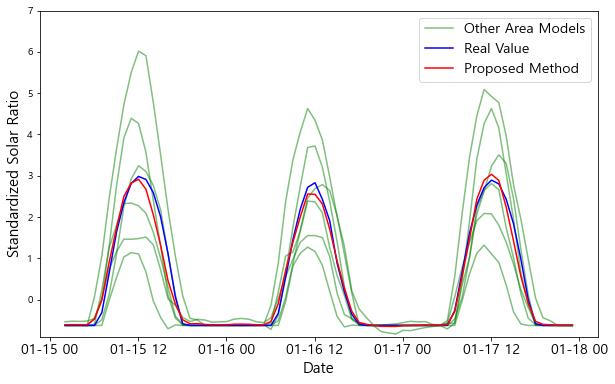

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
fig, ax = plt.subplots(figsize=(10,6))
index = 218 * 8 + 10
range = 70
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 0], 'g', alpha=0.5)#, label='제주 학습 모델')
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 1], 'g', alpha=0.5)#, label='부산 학습 모델')
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 2], 'g', alpha=0.5)#, label='영월 학습 모델')
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 3], 'g', alpha=0.5)#, label='인천 학습 모델')
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 4], 'g', alpha=0.5)#, label='하동 학습 모델')
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 5], 'g', alpha=0.5, label='Other Area Models')
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 6], 'b', label='Real Value')  #실제값
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 7], 'r', label='Proposed Method')  #예측값
# plt.legend(['제주 모델 예측값','부산 모델 예측값','영월 모델 예측값','인천 모델 예측값','하동 모델 예측값','신안 모델 예측값','진주 실제값','제안 기법 예측값'], fontsize=10)
dateFmt = mdates.DateFormatter('%m-%d %H')

ax.xaxis.set_major_formatter(dateFmt)
plt.xticks(fontsize=14, rotation=0)
plt.ylim([-0.9,7])
# plt.xticks(sorted(list(set([i.date().strftime('%m/%d') for i in date_index[index:index+range]]))))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Standardized Solar Ratio', fontsize=15)
plt.legend(fontsize=14, ncol=1)


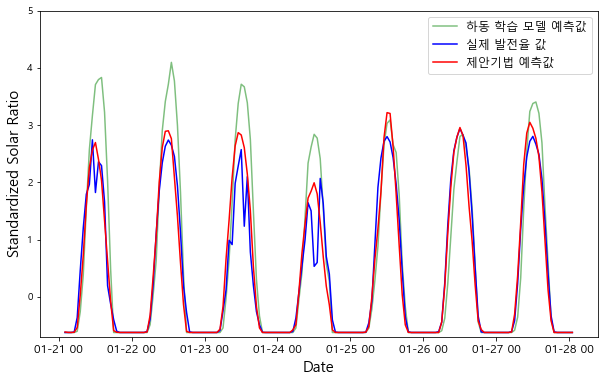

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
fig, ax = plt.subplots(figsize=(10,6))
index = 419 * 8 + 10
range = 168
# ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 0], 'g', alpha=0.5)
# ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 1], 'g', alpha=0.5)
# ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 2], 'g', alpha=0.5)
# ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 3], 'g', alpha=0.5)
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 4], 'g', alpha=0.5, label='하동 학습 모델 예측값')
# ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 5], 'g', alpha=0.5)
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 6], 'b', label='실제 발전율 값')  #실제값
ax.plot(date_index[index:index+range], pred_result_0.iloc[index:index+range, 7], 'r', label='제안기법 예측값')  #예측값
# plt.legend(['제주 모델 예측값','부산 모델 예측값','영월 모델 예측값','인천 모델 예측값','하동 모델 예측값','신안 모델 예측값','진주 실제값','제안 기법 예측값'], fontsize=10)
ax.xaxis.set_major_formatter(dateFmt)
plt.xticks(fontsize=12)
plt.ylim([-0.7,5])
# plt.xticks(sorted(list(set([i.date().strftime('%m/%d') for i in date_index[index:index+range]]))))
plt.xlabel('Date', fontsize=15)
plt.ylabel('Standardized Solar Ratio', fontsize=15)
plt.legend(fontsize=12)


In [101]:
import seaborn as sns

In [102]:
local_weight_0 = pd.read_csv(os.path.join('.', 'result', '20220421133455_hist72_pred1_modelDNN1_epoch30_trainBusan', 'local_weight_0.csv'), encoding='cp949', index_col=0)


In [112]:
local_weight_0.index = ['Weight']

In [113]:
local_weight_0

Jeju     Busan  YeongWol   Incheon    Hadong     Sinan
Weight  0.129873  0.184784  0.184832  0.151649  0.190849  0.158013

In [116]:
local_weight_0.columns = ['Jeju', "Busan", "Yeongwol", "Incheon", "Hadong", "Sinan"]

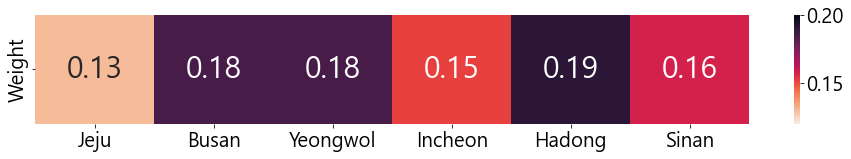

In [117]:
import seaborn as sns
plt.figure(figsize=(16,2))
plt.rcParams['font.family'] = 'Malgun Gothic'
ax = sns.heatmap(local_weight_0, cmap='rocket_r', vmin=0.12, vmax=0.2, annot=True, annot_kws={"fontsize":30})
cbar = ax.collections[0].colorbar
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
cbar.ax.tick_params(labelsize=20)
# plt.title('지역간 유사도', fontsize=20)


In [2]:
import pandas as pd
dataset_0 = pd.read_csv(f'./dataset/solar_weather_2017_2020_경상대.csv', encoding='cp949', index_col=0)


In [3]:
pd.concat([dataset_0.iloc[6::24],dataset_0.iloc[7::24],dataset_0.iloc[8::24],dataset_0.iloc[9::24],dataset_0.iloc[10::24],dataset_0.iloc[11::24],dataset_0.iloc[12::24],dataset_0.iloc[13::24],dataset_0.iloc[14::24],dataset_0.iloc[15::24],dataset_0.iloc[16::24],dataset_0.iloc[17::24],dataset_0.iloc[18::24]]).sort_index()

발전률  기온(°C)  강수량(mm)  풍속(m__s)  습도(%)  증기압(hPa)  현지기압(hPa)  \
측정일시                                                                          
2017010107  0.000000    -4.3      0.0       0.0   89.0       4.0     1025.9   
2017010108  0.000000    -4.4      0.0       0.0   89.0       3.9     1026.6   
2017010109  0.081945    -4.0      0.0       0.1   89.0       4.1     1027.1   
2017010110  0.213215    -1.9      0.0       0.0   89.0       4.8     1027.6   
2017010111  0.435182     1.4      0.0       0.0   88.0       6.0     1027.9   
...              ...     ...      ...       ...    ...       ...        ...   
2020123115  0.522696     1.7      0.0       0.7   34.0       2.3     1019.8   
2020123116  0.396994     3.1      0.0       1.0   36.0       2.8     1019.0   
2020123117  0.130475     2.7      0.0       4.8   44.0       3.3     1019.0   
2020123118  0.000796     0.8      0.0       4.5   52.0       3.4     1019.4   
2020123119  0.000000     0.1      0.0       4.4   56.0       3.5     1019.8   

            일조(hr)  지면온도(°C)    SO2   CO     O3    NO2  PM10  PM25  
측정일시                                                                
2017010107     0.0      -2.2  0.004  0.7  0.007  0.020  51.0  31.0  
2017010108     0.0      -2.5  0.003  0.8  0.007  0.020  52.0  28.0  
2017010109     0.0      -2.3  0.006  0.9  0.009  0.021  50.0  27.0  
2017010110     0.7      -0.9  0.007  0.8  0.011  0.021  59.0  37.0  
2017010111     0.6      -0.5  0.013  0.8  0.013  0.024  67.0  49.0  
...            ...       ...    ...  ...    ...    ...   ...   ...  
2020123115     1.0       2.8  0.005  0.3  0.033  0.007  11.0  14.0  
2020123116     1.0       2.7  0.005  0.3  0.031  0.009  17.0  13.0  
2020123117     1.0       0.2  0.005  0.4  0.027  0.013  15.0  12.0  
2020123118     0.7      -0.3  0.005  0.4  0.024  0.015  14.0   6.0  
2020123119     0.0      -0.3  0.005  0.4  0.019  0.020   9.0   0.0  

[18993 rows x 15 columns]

---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

one_hr_dir = os.path.join(os.getcwd(), 'result', '20220421133455_hist72_pred1_modelDNN1_epoch30_trainBusan_1')
daytime_dir = os.path.join(os.getcwd(), 'result', '20220822131244_hist72_pred1_modelDNN1_epoch30_trainBusan_12')
one_day_dir = os.path.join(os.getcwd(), 'result', '20220822151926_hist72_pred1_modelDNN1_epoch30_trainBusan_24')

In [6]:
os.getcwd()

'f:\\OneDrive - 고려대학교\\내 드라이브\\고려대학교\\VS_Projects_Graduate\\Projects\\Local_Solar_Ratio'

In [18]:
one_hr_solar_feature_corr = pd.read_csv(os.path.join(one_hr_dir, 'solar_to_feature_corr_13hr.csv'), encoding='cp949', index_col=0)
one_hr_solar_feature_corr = one_hr_solar_feature_corr.iloc[:, :7]
one_hr_solar_feature_corr.columns = ['Jinju', 'Jeju', 'Pusan', 'YeongWol', 'Incheon', 'Hadong', 'Sinan']
one_hr_solar_feature_corr.index = ['Temperature', 'Pricipitation', 'Wind Speed', 'Humidity', 'Vapor Pressure', 'Local Pressure', 'Sunshine', 'Ground Temp', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

In [19]:
one_hr_solar_feature_corr

Jinju      Jeju     Pusan  YeongWol   Incheon    Hadong  \
Temperature    -0.055634  0.156237 -0.054413 -0.179139 -0.185940 -0.058571   
Pricipitation  -0.307851 -0.195061 -0.226993 -0.259461 -0.212624 -0.346919   
Wind Speed      0.312161  0.083369  0.170554  0.191520  0.106910  0.164656   
Humidity       -0.717942 -0.333285 -0.598277 -0.712371 -0.610790 -0.678979   
Vapor Pressure -0.369895 -0.030278 -0.281765 -0.433272 -0.370970 -0.339119   
Local Pressure  0.267791  0.038085  0.196441  0.287375  0.300369  0.266079   
Sunshine        0.825708  0.633778  0.763162  0.804501  0.787360  0.824054   
Ground Temp     0.164920  0.418526  0.295953  0.035713  0.051928  0.214731   
SO2             0.025277  0.134439  0.123225  0.224258  0.161199  0.080246   
CO             -0.052177 -0.046405 -0.014639  0.053177 -0.042803  0.053907   
O3              0.418027  0.306224  0.369916  0.260951  0.299333  0.350341   
NO2            -0.206516 -0.286553 -0.163683 -0.060815 -0.203443 -0.041529   
PM10            0.171689  0.222044  0.236700  0.277965  0.146285  0.209117   
PM25            0.119770  0.192356  0.111279  0.174914 -0.012714  0.115627   

                   Sinan  
Temperature     0.020381  
Pricipitation  -0.191182  
Wind Speed     -0.013368  
Humidity       -0.566523  
Vapor Pressure -0.266899  
Local Pressure  0.176584  
Sunshine        0.625783  
Ground Temp     0.238367  
SO2            -0.003394  
CO              0.011845  
O3              0.379614  
NO2            -0.040735  
PM10            0.281089  
PM25            0.156336

In [20]:
daytime_hr_solar_feature_corr = pd.read_csv(os.path.join(daytime_dir, 'solar_to_feature_corr_daytime2.csv'), encoding='cp949', index_col=0)
daytime_hr_solar_feature_corr = daytime_hr_solar_feature_corr.iloc[:, :7]
daytime_hr_solar_feature_corr.columns = ['Jinju', 'Jeju', 'Pusan', 'YeongWol', 'Incheon', 'Hadong', 'Sinan']
daytime_hr_solar_feature_corr.index = ['Temperature', 'Pricipitation', 'Wind Speed', 'Humidity', 'Vapor Pressure', 'Local Pressure', 'Sunshine', 'Ground Temp', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

In [21]:
daytime_hr_solar_feature_corr

Jinju      Jeju     Pusan  YeongWol   Incheon    Hadong  \
Temperature     0.199659  0.231967  0.120297  0.131446  0.090448  0.215993   
Pricipitation  -0.134838 -0.093010 -0.103191 -0.119163 -0.100551 -0.115961   
Wind Speed      0.336175  0.150747  0.099277  0.224087  0.118984  0.271417   
Humidity       -0.495207 -0.257112 -0.310182 -0.496324 -0.459174 -0.505535   
Vapor Pressure -0.097144  0.060047 -0.057761 -0.139911 -0.107342 -0.081526   
Local Pressure  0.048384 -0.000942  0.062690  0.066240  0.061724  0.026677   
Sunshine        0.698926  0.603896  0.564312  0.687879  0.677649  0.698145   
Ground Temp     0.403399  0.560498  0.393574  0.344782  0.338730  0.476986   
SO2             0.065553  0.100951  0.130350 -0.002696  0.101548  0.104641   
CO             -0.128696 -0.097078 -0.078212 -0.195293 -0.183403 -0.093627   
O3              0.459456  0.326895  0.291980  0.392931  0.448985  0.458348   
NO2            -0.330727 -0.345511 -0.223159 -0.325916 -0.355716 -0.229924   
PM10            0.075517  0.131245  0.163102  0.123916  0.083697  0.099503   
PM25            0.162091  0.065951  0.068035  0.047543 -0.018975  0.016644   

                   Sinan  
Temperature     0.191918  
Pricipitation  -0.080489  
Wind Speed      0.076966  
Humidity       -0.372504  
Vapor Pressure -0.052726  
Local Pressure  0.003048  
Sunshine        0.571883  
Ground Temp     0.427110  
SO2             0.015203  
CO             -0.123928  
O3              0.394154  
NO2            -0.212588  
PM10            0.194300  
PM25            0.074461

In [22]:
one_day_hr_solar_feature_corr = pd.read_csv(os.path.join(one_day_dir, 'solar_to_feature_corr_all.csv'), encoding='cp949', index_col=0)
one_day_hr_solar_feature_corr = one_day_hr_solar_feature_corr.iloc[:, :7]
one_day_hr_solar_feature_corr.columns = ['Jinju', 'Jeju', 'Pusan', 'YeongWol', 'Incheon', 'Hadong', 'Sinan']
one_day_hr_solar_feature_corr.index = ['Temperature', 'Pricipitation', 'Wind Speed', 'Humidity', 'Vapor Pressure', 'Local Pressure', 'Sunshine', 'Ground Temp', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

In [23]:
one_day_hr_solar_feature_corr

Jinju      Jeju     Pusan  YeongWol   Incheon    Hadong  \
Temperature     0.243226  0.213075  0.158897  0.164408  0.106254  0.219581   
Pricipitation  -0.075952 -0.062188 -0.063498 -0.065570 -0.059860 -0.073540   
Wind Speed      0.410628  0.180072  0.110564  0.287846  0.127628  0.212307   
Humidity       -0.503371 -0.228513 -0.276795 -0.443410 -0.411138 -0.431113   
Vapor Pressure -0.057038  0.064079 -0.015567 -0.079354 -0.072102 -0.042472   
Local Pressure  0.012563 -0.001415  0.034358  0.026936  0.037266  0.014794   
Sunshine        0.805358  0.730112  0.727581  0.779044  0.784097  0.798631   
Ground Temp     0.450913  0.560780  0.428393  0.383926  0.359997  0.492286   
SO2             0.149228  0.112037  0.114415 -0.078070  0.112885  0.248258   
CO             -0.040481 -0.059660 -0.046950 -0.192912 -0.150104  0.117612   
O3              0.453621  0.288811  0.274044  0.394588  0.424107  0.369558   
NO2            -0.173898 -0.177732 -0.078990 -0.241359 -0.226803 -0.012883   
PM10            0.085280  0.122103  0.148048  0.062761  0.077719  0.142761   
PM25            0.147652  0.035962  0.026696  0.002431  0.002329  0.064487   

                   Sinan  
Temperature     0.180490  
Pricipitation  -0.052931  
Wind Speed      0.133733  
Humidity       -0.383809  
Vapor Pressure -0.045499  
Local Pressure  0.009531  
Sunshine        0.727807  
Ground Temp     0.452734  
SO2             0.066068  
CO             -0.061955  
O3              0.342856  
NO2            -0.062833  
PM10            0.142278  
PM25            0.043076

In [13]:
one_hr_solar_feature_corr.iloc[0]

Jinju      -0.055634
Jeju        0.156237
Pusan      -0.054413
YeongWol   -0.179139
Incheon    -0.185940
Hadong     -0.058571
Sinan       0.020381
Name: Temperature, dtype: float64

In [14]:
len(one_hr_solar_feature_corr)

14

<ipython-input-64-1a4e87796587>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['','','','','','',''], rotation=90, fontsize=16)


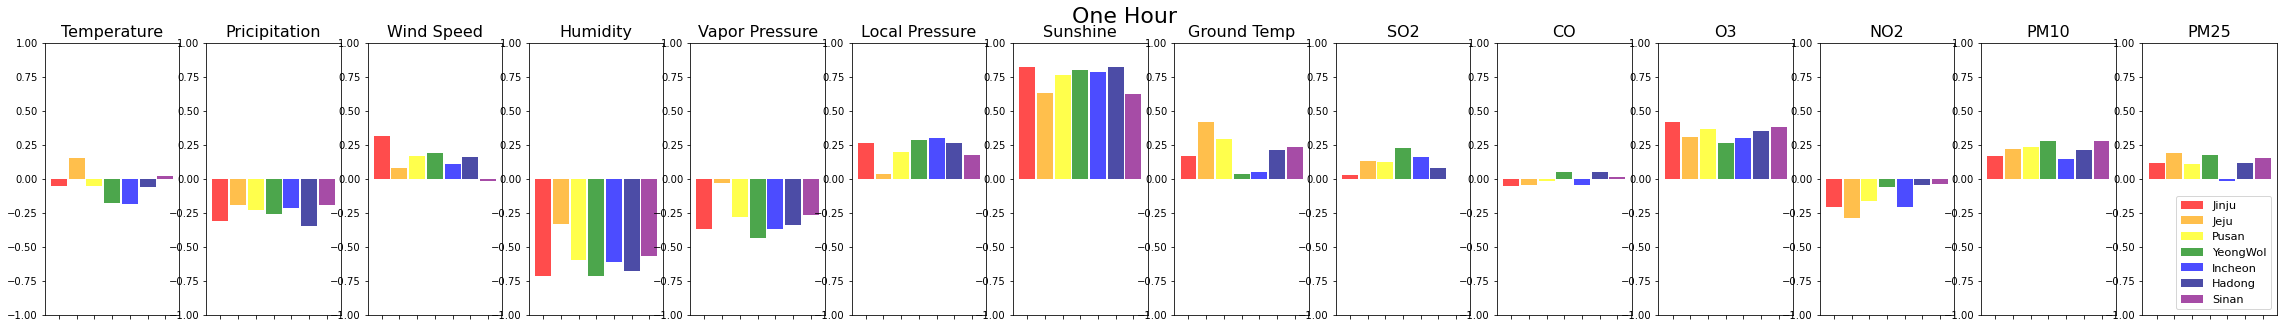

In [64]:
%matplotlib inline
# plt.figure(figsize=(40,10))
fig, ax = plt.subplots(1,14, figsize=(40,5))
# plt.set_title('One Hour')
fig.suptitle('One Hour', fontsize=22)
for i in range(len(one_hr_solar_feature_corr)):
    bars = ax[i].bar(one_hr_solar_feature_corr.columns, one_hr_solar_feature_corr.iloc[i], color=['red','orange','yellow','green','blue','navy','purple'], alpha=0.7, width=0.9)
    ax[i].set_title(one_hr_solar_feature_corr.index[i], fontsize=16)
    ax[i].set_ylim([-1, 1])
    # ax[i].set_xticklabels(one_hr_solar_feature_corr.columns, rotation=90, fontsize=16)
    ax[i].set_xticklabels(['','','','','','',''], rotation=90, fontsize=16)
    # ax[0].tick_params(labelrotation=90)
    # plt.xticks(rotation=90)

ax[i].legend(handles=bars, labels=['Jinju', 'Jeju', 'Pusan', 'YeongWol', 'Incheon', 'Hadong', 'Sinan'], loc='lower right', fontsize=11.3)

<ipython-input-74-0997d59b9bb7>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['','','','','','',''], rotation=90, fontsize=16)


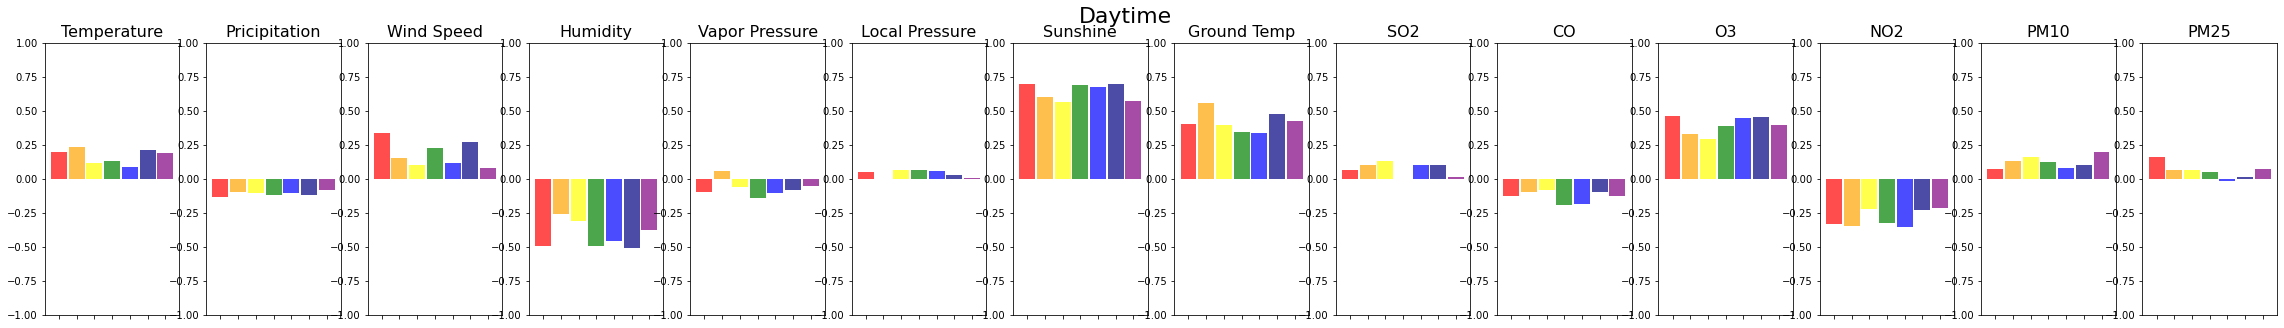

In [74]:
%matplotlib inline
# plt.figure(figsize=(40,10))
'''fig, ax = plt.subplots(1,14, figsize=(40,5))
# plt.set_title('One Hour')
fig.suptitle('Daytime', fontsize=20)
for i in range(len(daytime_hr_solar_feature_corr)):
    ax[i].bar(daytime_hr_solar_feature_corr.columns, daytime_hr_solar_feature_corr.iloc[i], color=['red','orange','yellow','green','blue','navy','purple'], alpha=0.7, width=0.9)
    ax[i].set_title(daytime_hr_solar_feature_corr.index[i])
    ax[i].set_ylim([-1, 1])
    ax[i].set_xticklabels(daytime_hr_solar_feature_corr.columns, rotation=90)
    # ax[0].tick_params(labelrotation=90)
    # plt.xticks(rotation=90)'''
    
%matplotlib inline
# plt.figure(figsize=(40,10))
fig, ax = plt.subplots(1,14, figsize=(40,5))
# plt.set_title('One Hour')
fig.suptitle('Daytime', fontsize=22)
for i in range(len(daytime_hr_solar_feature_corr)):
    bars = ax[i].bar(daytime_hr_solar_feature_corr.columns, daytime_hr_solar_feature_corr.iloc[i], color=['red','orange','yellow','green','blue','navy','purple'], alpha=0.7, width=0.9)
    ax[i].set_title(daytime_hr_solar_feature_corr.index[i], fontsize=16)
    ax[i].set_ylim([-1, 1])
    # ax[i].set_xticklabels(daytime_hr_solar_feature_corr.columns, rotation=90, fontsize=16)
    ax[i].set_xticklabels(['','','','','','',''], rotation=90, fontsize=16)
    # ax[0].tick_params(labelrotation=90)
    # plt.xticks(rotation=90)

# ax[i].legend(handles=bars, labels=['Jinju', 'Jeju', 'Pusan', 'YeongWol', 'Incheon', 'Hadong', 'Sinan'], loc='lower right', fontsize=11.3)

<ipython-input-73-c8a97be6fe33>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(['','','','','','',''], rotation=90, fontsize=16)


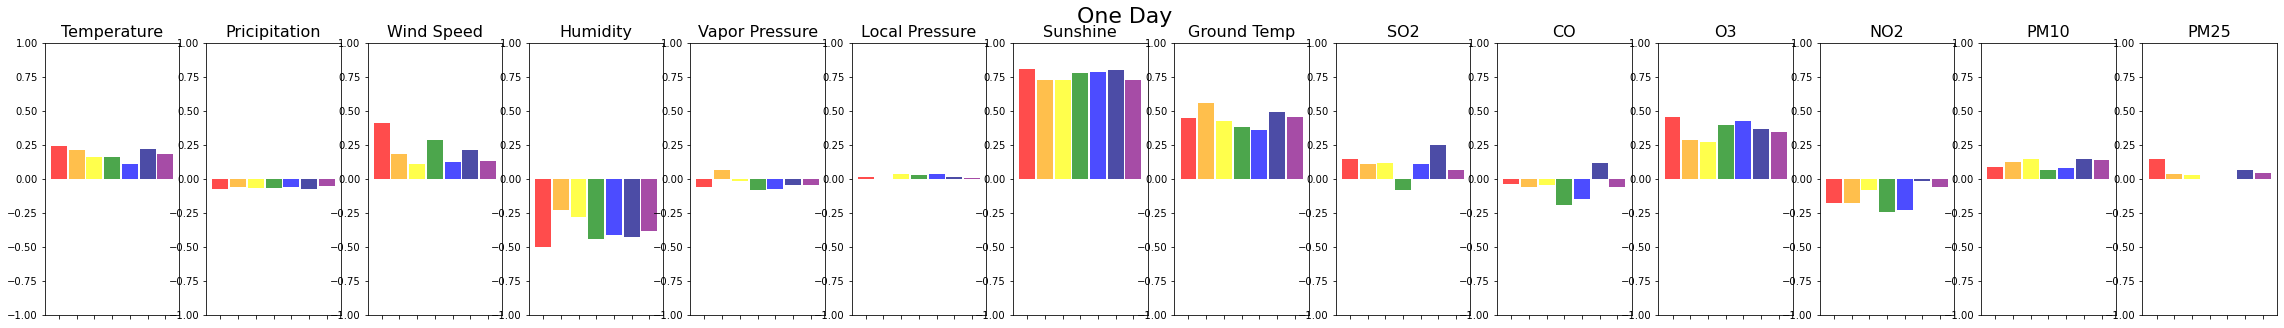

In [73]:
'''%matplotlib inline
# plt.figure(figsize=(40,10))
fig, ax = plt.subplots(1,14, figsize=(40,5))
# plt.set_title('One Hour')
fig.suptitle('One Day', fontsize=20)
for i in range(len(one_day_hr_solar_feature_corr)):
    ax[i].bar(one_day_hr_solar_feature_corr.columns, one_day_hr_solar_feature_corr.iloc[i], color=['red','orange','yellow','green','blue','navy','purple'], alpha=0.7, width=0.9)
    ax[i].set_title(one_day_hr_solar_feature_corr.index[i])
    ax[i].set_ylim([-1, 1])
    ax[i].set_xticklabels(one_day_hr_solar_feature_corr.columns, rotation=90)
    # ax[0].tick_params(labelrotation=90)
    # plt.xticks(rotation=90)'''
    
%matplotlib inline
# plt.figure(figsize=(40,10))
fig, ax = plt.subplots(1,14, figsize=(40,5))
# plt.set_title('One Hour')
fig.suptitle('One Day', fontsize=22)
for i in range(len(one_day_hr_solar_feature_corr)):
    bars = ax[i].bar(one_day_hr_solar_feature_corr.columns, one_day_hr_solar_feature_corr.iloc[i], color=['red','orange','yellow','green','blue','navy','purple'], alpha=0.7, width=0.9)
    ax[i].set_title(one_day_hr_solar_feature_corr.index[i], fontsize=16)
    ax[i].set_ylim([-1, 1])
    # ax[i].set_xticklabels(one_day_hr_solar_feature_corr.columns, rotation=90, fontsize=16)
    ax[i].set_xticklabels(['','','','','','',''], rotation=90, fontsize=16)
    # ax[0].tick_params(labelrotation=90)
    # plt.xticks(rotation=90)

# ax[i].legend(handles=bars, labels=['Jinju', 'Jeju', 'Pusan', 'YeongWol', 'Incheon', 'Hadong', 'Sinan'], loc='lower right', fontsize=11.3)